In [2]:
!pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 469.7 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.0 MB 722.1 kB/s eta 0:00:16
   ------ --------------------------------- 1.7/11.0 MB 4.3 MB/s eta 0:00:03
   -------------------------------- ------- 8.8/11.0 MB 13.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.4/11.0 MB 19.9 MB/s eta 0:00:01
   -------------------------------------- - 10.6/11.0 MB 21.1 MB/s eta 0:00:01
   -------------------------------------- - 10.6/11.0 MB 21.1 MB/s eta 0:00:01
   -------------------------------------- - 10.6/11.0 MB 16.0 MB/s eta 0:00:01
   -------------------------------------- - 10.6/11.0 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------  10.8/11.0 MB 12.1 MB/s eta 0:0

  You can safely remove it manually.


In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score ,recall_score

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.svm import SVC
from keras.callbacks import EarlyStopping


from tensorflow import keras

from numpy import average
from keras import backend as K
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from keras.models import load_model

from numpy import dstack
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from numpy import average

# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import ImageFilter
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as python_random
import tensorflow as tf
import seaborn as sns
import math
from sklearn.metrics import classification_report, confusion_matrix
#from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
#from tensorflow.keras.layers import preprocessing
from tensorflow.keras.layers import Rescaling, Normalization, RandomFlip, RandomRotation
from tensorflow.keras.layers import Rescaling, Normalization, RandomFlip, RandomRotation


In [89]:
#from google.colab import drive
#drive.mount('/content/drive')

In [90]:
# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import ImageFilter

height, width = 224, 224
batch_size=64


def generate_data(DIR):
    datagen = ImageDataGenerator(rescale=1./255.)
    
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        shuffle=True,
        seed=42,
        class_mode='categorical',
        target_size=(height, width),
        classes={
        'Apple___Apple_scab': 0, 
        'Apple___Black_rot': 1, 
        'Apple___Cedar_apple_rust': 2, 
        'Apple___healthy': 3, 
        'Blueberry___healthy': 4, 
        'Cherry_(including_sour)___Powdery_mildew': 5, 
        'Cherry_(including_sour)___healthy': 6, 
        'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 
        'Corn_(maize)___Common_rust_': 8, 
        'Corn_(maize)___Northern_Leaf_Blight': 9, 
        'Corn_(maize)___healthy': 10, 
        'Grape___Black_rot': 11, 
        'Grape___Esca_(Black_Measles)': 12, 
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 
        'Grape___healthy': 14, 
        'Orange___Haunglongbing_(Citrus_greening)': 15, 
        'Peach___Bacterial_spot': 16, 
        'Peach___healthy': 17, 
        'Pepper,_bell___Bacterial_spot': 18, 
        'Pepper,_bell___healthy': 19, 
        'Potato___Early_blight': 20, 
        'Potato___Late_blight': 21, 
        'Potato___healthy': 22, 
        'Raspberry___healthy': 23, 
        'Soybean___healthy': 24, 
        'Squash___Powdery_mildew': 25, 
        'Strawberry___Leaf_scorch': 26, 
        'Strawberry___healthy': 27, 
        'Tomato___Bacterial_spot': 28, 
        'Tomato___Early_blight': 29, 
        'Tomato___Late_blight': 30, 
        'Tomato___Leaf_Mold': 31, 
        'Tomato___Septoria_leaf_spot': 32, 
        'Tomato___Spider_mites_Two-spotted_spider_mite': 33, 
        'Tomato___Target_Spot': 34, 
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 
        'Tomato___Tomato_mosaic_virus': 36, 
        'Tomato___healthy': 37
    }
    )
    return generator

TRAINING_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_2/train_folder/'
TESTING_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_2/test_folder/'
Val_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_2/valid_folder/'

train_generator = generate_data(TRAINING_DIR)
test_generator = generate_data(TESTING_DIR)
val_generator = generate_data(Val_DIR)


total_image = np.concatenate([train_generator.labels,test_generator.labels,val_generator.labels])

print('\n\n',{'colon_n':len(np.where(total_image==0)[0]),
      'colon_aca':len(np.where(total_image==1)[0])})

Found 36465 images belonging to 38 classes.
Found 5232 images belonging to 38 classes.
Found 10420 images belonging to 38 classes.


 {'colon_n': 630, 'colon_aca': 621}


In [91]:
# Assuming total_image contains labels from 0 to 37
class_counts = {f'class_{i}': len(np.where(total_image == i)[0]) for i in range(38)}

print('\n\n', class_counts)




 {'class_0': 630, 'class_1': 621, 'class_2': 275, 'class_3': 1645, 'class_4': 1502, 'class_5': 1052, 'class_6': 854, 'class_7': 0, 'class_8': 1192, 'class_9': 985, 'class_10': 1162, 'class_11': 1180, 'class_12': 1384, 'class_13': 1076, 'class_14': 423, 'class_15': 5507, 'class_16': 2297, 'class_17': 360, 'class_18': 997, 'class_19': 1478, 'class_20': 1000, 'class_21': 1000, 'class_22': 152, 'class_23': 371, 'class_24': 5090, 'class_25': 1835, 'class_26': 1109, 'class_27': 456, 'class_28': 2127, 'class_29': 1000, 'class_30': 1909, 'class_31': 952, 'class_32': 1771, 'class_33': 0, 'class_34': 1404, 'class_35': 5357, 'class_36': 373, 'class_37': 1591}


In [92]:
def generate_data_augmented(DIR):
    datagen = ImageDataGenerator(
        rescale=1./255.,
        zoom_range=0.2,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,shear_range=0.2,
        horizontal_flip = True, 
    )
    generator = datagen.flow_from_directory(
        TRAINING_DIR,
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        target_size=(height, width),
        classes={
        'Apple___Apple_scab': 0, 
        'Apple___Black_rot': 1, 
        'Apple___Cedar_apple_rust': 2, 
        'Apple___healthy': 3, 
        'Blueberry___healthy': 4, 
        'Cherry_(including_sour)___Powdery_mildew': 5, 
        'Cherry_(including_sour)___healthy': 6, 
        'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 
        'Corn_(maize)___Common_rust_': 8, 
        'Corn_(maize)___Northern_Leaf_Blight': 9, 
        'Corn_(maize)___healthy': 10, 
        'Grape___Black_rot': 11, 
        'Grape___Esca_(Black_Measles)': 12, 
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 
        'Grape___healthy': 14, 
        'Orange___Haunglongbing_(Citrus_greening)': 15, 
        'Peach___Bacterial_spot': 16, 
        'Peach___healthy': 17, 
        'Pepper,_bell___Bacterial_spot': 18, 
        'Pepper,_bell___healthy': 19, 
        'Potato___Early_blight': 20, 
        'Potato___Late_blight': 21, 
        'Potato___healthy': 22, 
        'Raspberry___healthy': 23, 
        'Soybean___healthy': 24, 
        'Squash___Powdery_mildew': 25, 
        'Strawberry___Leaf_scorch': 26, 
        'Strawberry___healthy': 27, 
        'Tomato___Bacterial_spot': 28, 
        'Tomato___Early_blight': 29, 
        'Tomato___Late_blight': 30, 
        'Tomato___Leaf_Mold': 31, 
        'Tomato___Septoria_leaf_spot': 32, 
        'Tomato___Spider_mites_Two-spotted_spider_mite': 33, 
        'Tomato___Target_Spot': 34, 
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 
        'Tomato___Tomato_mosaic_virus': 36, 
        'Tomato___healthy': 37
    }
    )
    return generator

aug_train_generator = generate_data_augmented(TRAINING_DIR)
aug_test_generator = generate_data_augmented(TESTING_DIR)
aug_val_generator = generate_data_augmented(val_generator)

Found 36465 images belonging to 38 classes.
Found 36465 images belonging to 38 classes.
Found 36465 images belonging to 38 classes.


In [93]:
Epochs=20
BATCH_SIZE=100

In [94]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [95]:
dependencies = {'f1_m': f1_m ,'precision_m':precision_m,'recall_m':recall_m}

In [96]:
y_train = []
X_train = []

for i in range(math.ceil(len(train_generator.classes) / batch_size)):
    X_train.append(train_generator[i][0]) 
    y_train.append(train_generator[i][1])  # Append labels as 2D array

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)  # Convert to array and concatenate

y_test = []
X_test = []

for i in range(math.ceil(len(val_generator.classes) / batch_size)):
    X_test.append(val_generator[i][0]) 
    y_test.append(val_generator[i][1])  # Append labels as 2D array

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [97]:
y_train = np.argmax(y_train, axis=1)  # Convert one-hot to class labels
y_test = np.argmax(y_test, axis=1)


In [98]:
from keras.models import load_model
model_vgg16= load_model('./VGG16_segmented.h5',custom_objects=dependencies )
model_vgg19= load_model('./VGG19_segmented.h5',custom_objects=dependencies )
model_resnet50= load_model('./ResNet50_segmented.h5',custom_objects=dependencies)
model_resnet101= load_model('./ResNet101_segmented.h5',custom_objects=dependencies)
model_inception_v3= load_model('./InceptionV3_segmented.h5',custom_objects=dependencies )
model_DenseNet121 = load_model('./DenseNet121_segmented.h5',custom_objects=dependencies )
model_DenseNet169 = load_model('./DenseNet169_segmented.h5',custom_objects=dependencies )
model_MobileNet= load_model('./MobileNet_segmented.h5',custom_objects=dependencies )
model_MobileNetv2= load_model('./MobileNetV2_segmented.h5',custom_objects=dependencies )


In [99]:
members={'vgg16':model_vgg16,'vgg19':model_vgg19,'resnet50':model_resnet50,'resnet101':model_resnet101,
         'inception_v3':model_inception_v3,'DenseNet169':model_DenseNet169,
         'DenseNet121':model_DenseNet121,'MobileNet':model_MobileNet,
        'MobileNetV2':model_MobileNetv2}

In [30]:
#members['vgg16'].summary()

In [31]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members,padded_train, padded_test, y_train,stack_Train, stack_Test,BATCH_SIZE,epoch):
    for key in members:     
        
        if key=='vgg16':
            #members['vgg16'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['vgg16'].predict(padded_train)
            yhat2 = members['vgg16'].predict(padded_test)
            
        elif key=='vgg19':
            #members['resnet50'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['vgg19'].predict(padded_train)
            yhat2 = members['vgg19'].predict(padded_test)

        elif key=='resnet50':
            #members['inception_v3'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['resnet50'].predict(padded_train)
            yhat2 = members['resnet50'].predict(padded_test)
        elif key=='resnet101':
            #members['DenseNet121'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['resnet101'].predict(padded_train)
            yhat2 = members['resnet101'].predict(padded_test)

        elif key=='inception_v3':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['inception_v3'].predict(padded_train)
            yhat2 = members['inception_v3'].predict(padded_test)
        elif key=='DenseNet121':
            #members['inception_v3'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['DenseNet121'].predict(padded_train)
            yhat2 = members['DenseNet121'].predict(padded_test)
        elif key=='DenseNet169':
            #members['DenseNet121'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['DenseNet169'].predict(padded_train)
            yhat2 = members['DenseNet169'].predict(padded_test)

        elif key=='MobileNetv2':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['MobileNetv2'].predict(padded_train)
            yhat2 = members['MobileNetv2'].predict(padded_test)
        elif key=='MobileNet':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['MobileNet'].predict(padded_train)
            yhat2 = members['MobileNet'].predict(padded_test)
        if stack_Train is None:
            stack_Train = yhat1
        else:
            stack_Train = dstack((stack_Train, yhat1))
        
        if stack_Test is None:
            stack_Test = yhat2
        else:
            stack_Test = dstack((stack_Test, yhat2))
            
    stack_Train = stack_Train.reshape((stack_Train.shape[0], stack_Train.shape[1]*stack_Train.shape[2]))
    stack_Test = stack_Test.reshape((stack_Test.shape[0], stack_Test.shape[1]*stack_Test.shape[2]))
    return stack_Train, stack_Test


In [32]:
SFold = StratifiedKFold(n_splits=10,  shuffle=True,random_state=120)

In [46]:
SVM_DIC={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[]}
LR_DIC={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[]}
RF_DIC={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[]}
SVM_DIC_Train={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[],'SDAccuracy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}
LR_DIC_Train={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[], 'SDAccuracy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}
RF_DIC_Train={'Accuracy':[], 'Precision': [],'Recall':[],'F1':[], 'SDAccuracy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}

stackX_Test=None
stackX_Train=None
stackX_Train,stackX_Test =stacked_dataset(members,X_train, X_test, y_train, stackX_Train, stackX_Test,BATCH_SIZE, Epochs)
  

1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3445s 3s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 1073s 3s/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 4829s 4s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 1381s 4s/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1238s 1s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 2324s 2s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 655s 2s/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 721s 632ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 209s 642ms/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1280s 1s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1063s 933ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 303s 928ms/step
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 268s 235ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 77s 235ms/step


In [47]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='weighted'),
           'recall' : make_scorer(recall_score, average='weighted'), 
           'f1_score' : make_scorer(f1_score, average='weighted')}

# Support vector machine

In [51]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=SFold)
grid_search.fit(stackX_Train, y_train)
model_SVM = grid_search.best_estimator_

In [53]:
scores_Train_SVM = cross_validate(model_SVM, stackX_Train, y_train, scoring=scoring,  cv=SFold)
SVM_DIC_Train['Accuracy'].append(round(100*np.mean(scores_Train_SVM['test_accuracy']), 2))
SVM_DIC_Train['SDAccuracy'].append(round(100 * np.std(scores_Train_SVM['test_accuracy']), 2))


SVM_DIC_Train['Precision'].append(round(100*np.mean(scores_Train_SVM['test_precision']), 2))
SVM_DIC_Train['SDPrecision'].append(round(100*np.std(scores_Train_SVM['test_precision']), 2))


SVM_DIC_Train['Recall'].append(round(100*np.mean(scores_Train_SVM['test_recall']), 2))
SVM_DIC_Train['SDRecall'].append(round(100*np.std(scores_Train_SVM['test_recall']), 2))


SVM_DIC_Train['F1'].append(round(100*np.mean(scores_Train_SVM['test_f1_score']), 2))
SVM_DIC_Train['SDF1'].append(round(100*np.std(scores_Train_SVM['test_f1_score']), 2))

yhat_SVM=model_SVM.predict(stackX_Test)

SVM_DIC['Accuracy'].append(round(100*accuracy_score(y_test, yhat_SVM), 2))
SVM_DIC['Precision'].append(round(100*precision_score(y_test, yhat_SVM,average='weighted'), 2))
SVM_DIC['Recall'].append(round(100*recall_score(y_test, yhat_SVM, average='weighted'), 2))
SVM_DIC['F1'].append(round(100*f1_score(y_test, yhat_SVM, average='weighted') , 2))     


In [57]:
print('SVM Train')
finaltrain = pd.DataFrame([])

# Create a new DataFrame for the row to append
new_row = pd.DataFrame([{
    'AccuracyTrain': round(np.mean(SVM_DIC_Train['Accuracy']), 2),
    'PrecisionTrain': round(np.mean(SVM_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(SVM_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(SVM_DIC_Train['F1']), 2)
}])

# Use pd.concat to append
finaltrain = pd.concat([finaltrain, new_row], ignore_index=True)

# Reordering columns if necessary
finaltrain = finaltrain[['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train']]
finaltrain

SVM Train


AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.65           99.65        99.65    99.65

In [58]:
print("SVM Test")
ReultofTest = pd.DataFrame([])

# Creating a new DataFrame for the row to add
new_test_row = pd.DataFrame([{
    'AccuracyTest': round(np.mean(SVM_DIC['Accuracy']), 2),
    'PrecisionTest': round(np.mean(SVM_DIC['Precision']), 2),
    'RecallTest': round(np.mean(SVM_DIC['Recall']), 2),
    'F1Test': round(np.mean(SVM_DIC['F1']), 2)
}])

# Using pd.concat to add the row
ReultofTest = pd.concat([ReultofTest, new_test_row], ignore_index=True)

# Reordering columns if needed
ReultofTest = ReultofTest[['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test']]
ReultofTest

SVM Test


AccuracyTest  PrecisionTest  RecallTest  F1Test
0         99.28          99.28       99.28   99.28

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       126
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00       329
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       210
           6       0.99      1.00      1.00       171
           8       0.99      0.99      0.99       238
           9       0.99      0.99      0.99       197
          10       1.00      1.00      1.00       232
          11       1.00      0.99      1.00       236
          12       1.00      1.00      1.00       277
          13       1.00      1.00      1.00       215
          14       1.00      1.00      1.00        84
          15       1.00      1.00      1.00      1102
          16       1.00      1.00      1.00       460
          17       1.00      0.99      0.99        72
          18       0.99    

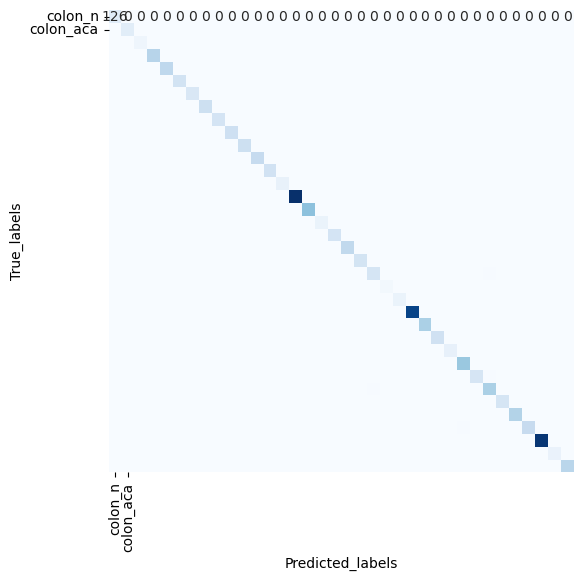

In [59]:

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,yhat_SVM), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['colon_n', 'colon_aca'],yticklabels=['colon_n', 'colon_aca'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
print(classification_report(y_test,yhat_SVM))

# Logitic regreession 

In [60]:

#param_grid = {"penalty":["l1","l2"], "C":np.logspace(0, 4, 10, -3,3,7) }
param_grid={"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear','newton-cg'],
                  'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = SFold ) 
grid_search.fit(stackX_Train, y_train)
LR = grid_search.best_estimator_




In [63]:
scores_Train_LR = cross_validate(LR, stackX_Train, y_train, scoring=scoring, cv=SFold)
LR_DIC_Train['Accuracy'].append(round(100 * np.mean(scores_Train_LR['test_accuracy']), 2))
LR_DIC_Train['SDAccuracy'].append(round(100 * np.std(scores_Train_LR['test_accuracy']), 2))

LR_DIC_Train['Precision'].append(round(100 * np.mean(scores_Train_LR['test_precision']), 2))
LR_DIC_Train['SDPrecision'].append(round(100 * np.std(scores_Train_LR['test_precision']), 2))

LR_DIC_Train['Recall'].append(round(100 * np.mean(scores_Train_LR['test_recall']), 2))
LR_DIC_Train['SDRecall'].append(round(100 * np.std(scores_Train_LR['test_recall']), 2))

LR_DIC_Train['F1'].append(round(100 * np.mean(scores_Train_LR['test_f1_score']), 2))
LR_DIC_Train['SDF1'].append(round(100 * np.std(scores_Train_LR['test_f1_score']), 2))

yhat_LR = cross_val_predict(LR, stackX_Test, y_test, cv=SFold)

LR_DIC['Accuracy'].append(round(100 * accuracy_score(y_test, yhat_LR), 2))
LR_DIC['Precision'].append(round(100 * precision_score(y_test, yhat_LR, average='weighted'), 2))
LR_DIC['Recall'].append(round(100 * recall_score(y_test, yhat_LR, average='weighted'), 2))
LR_DIC['F1'].append(round(100 * f1_score(y_test, yhat_LR, average='weighted'), 2))


In [65]:
print('RF Train')
finaltrain = pd.DataFrame(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

finaltrain.loc[0] = {
    'AccuracyTrain': round(np.mean(LR_DIC_Train['Accuracy']), 2),
    'PrecisionTrain': round(np.mean(LR_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(LR_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(LR_DIC_Train['F1']), 2)
}

finaltrain


RF Train


AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0           99.6           99.61         99.6     99.6

In [67]:
print("LR Test")
ReultofTest = pd.DataFrame(columns=['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test'])

ReultofTest.loc[0] = {
    'AccuracyTest': round(np.mean(LR_DIC['Accuracy']), 2),
    'PrecisionTest': round(np.mean(LR_DIC['Precision']), 2),
    'RecallTest': round(np.mean(LR_DIC['Recall']), 2),
    'F1Test': round(np.mean(LR_DIC['F1']), 2)
}

ReultofTest


LR Test


AccuracyTest  PrecisionTest  RecallTest  F1Test
0         99.26          99.26       99.26   99.26

In [69]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for each class
yhat_probs = LR.predict_proba(stackX_Test)

# Calculate AUROC with weighted average and one-vs-rest approach for multiclass
auroc = roc_auc_score(y_test, yhat_probs, multi_class="ovr", average="weighted")

print(f"AUROC: {auroc:.2f}")


AUROC: 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      0.99      1.00       124
           2       1.00      0.98      0.99        55
           3       0.99      1.00      1.00       329
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       210
           6       1.00      1.00      1.00       171
           8       0.99      0.99      0.99       238
           9       0.99      0.99      0.99       197
          10       1.00      1.00      1.00       232
          11       0.99      0.99      0.99       236
          12       1.00      1.00      1.00       277
          13       1.00      1.00      1.00       215
          14       1.00      1.00      1.00        84
          15       1.00      1.00      1.00      1102
          16       1.00      1.00      1.00       460
          17       1.00      1.00      1.00        72
          18       0.99    

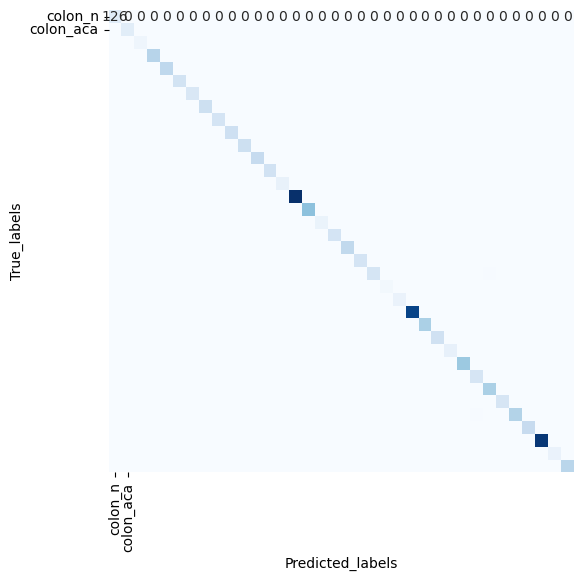

In [72]:

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,yhat_LR), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['colon_n', 'colon_aca'],yticklabels=['colon_n', 'colon_aca'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
print(classification_report(y_test,yhat_LR))

# Random Forest

In [73]:
param_grid = {
'max_depth': [10,20,40,50,60],
  'criterion': ['gini', 'entropy']} 

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = SFold)
grid_search.fit(stackX_Train, y_train)

model_RF = grid_search.best_estimator_




In [74]:
scores_Train_RF = cross_validate(model_RF, stackX_Train, y_train, scoring=scoring,  cv=SFold)
RF_DIC_Train['Accuracy'].append(round(100*np.mean(scores_Train_RF['test_accuracy']), 2))
RF_DIC_Train['SDAccuracy'].append(round(100*np.std(scores_Train_RF['test_accuracy']), 2))


RF_DIC_Train['Precision'].append(round(100*np.mean(scores_Train_RF['test_precision']), 2))
RF_DIC_Train['SDPrecision'].append(round(100*np.std(scores_Train_RF['test_precision']), 2))


RF_DIC_Train['Recall'].append(round(100*np.mean(scores_Train_RF['test_recall']), 2))
RF_DIC_Train['SDRecall'].append(round(100*np.std(scores_Train_RF['test_recall']), 2))


RF_DIC_Train['F1'].append(round(100*np.mean(scores_Train_RF['test_f1_score']), 2))
RF_DIC_Train['SDF1'].append(round(100*np.std(scores_Train_RF['test_f1_score']), 2))



yhat_RF=cross_val_predict(model_RF, stackX_Test,y_test, cv=SFold)

RF_DIC['Accuracy'].append(round(100*accuracy_score(y_test, yhat_RF), 2))
RF_DIC['Precision'].append(round(100*precision_score(y_test, yhat_RF,average='weighted'), 2))
RF_DIC['Recall'].append(round(100*recall_score(y_test, yhat_RF, average='weighted'), 2))
RF_DIC['F1'].append(round(100*f1_score(y_test, yhat_RF, average='weighted') , 2))

In [78]:
print('RF Train')
finaltrain = pd.DataFrame([{
    'AccuracyTrain': round(np.mean(RF_DIC_Train['Accuracy']), 2),
    'PrecisionTrain': round(np.mean(RF_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(RF_DIC_Train['Recall']), 2),  
    'F1Train': round(np.mean(RF_DIC_Train['F1']), 2)
}])

# Ensure the columns are in the desired order
finaltrain = finaltrain[['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train']]
finaltrain

RF Train


AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.63           99.64        99.63    99.63

In [80]:
print("SVM Test")
ReultofTest = pd.DataFrame([{
    'AccuracyTest': round(np.mean(RF_DIC['Accurcy']), 2),
    'PrecisionTest': round(np.mean(RF_DIC['Precision']), 2),
    'RecallTest': round(np.mean(RF_DIC['Recall']), 2),
    'F1Test': round(np.mean(RF_DIC['F1']), 2)
}])

# Ensure the columns are in the desired order
ReultofTest = ReultofTest[['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test']]


SVM Test


KeyError: 'Accurcy'

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       625
         1.0       1.00      1.00      1.00       625

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



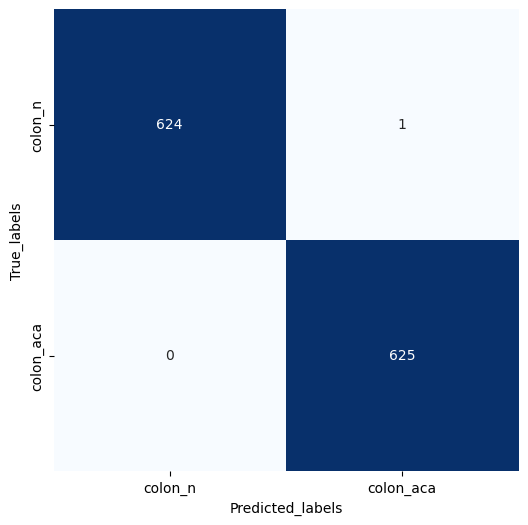

In [35]:

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,yhat_RF), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['colon_n', 'colon_aca'],yticklabels=['colon_n', 'colon_aca'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
print(classification_report(y_test,yhat_RF))

326/326 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


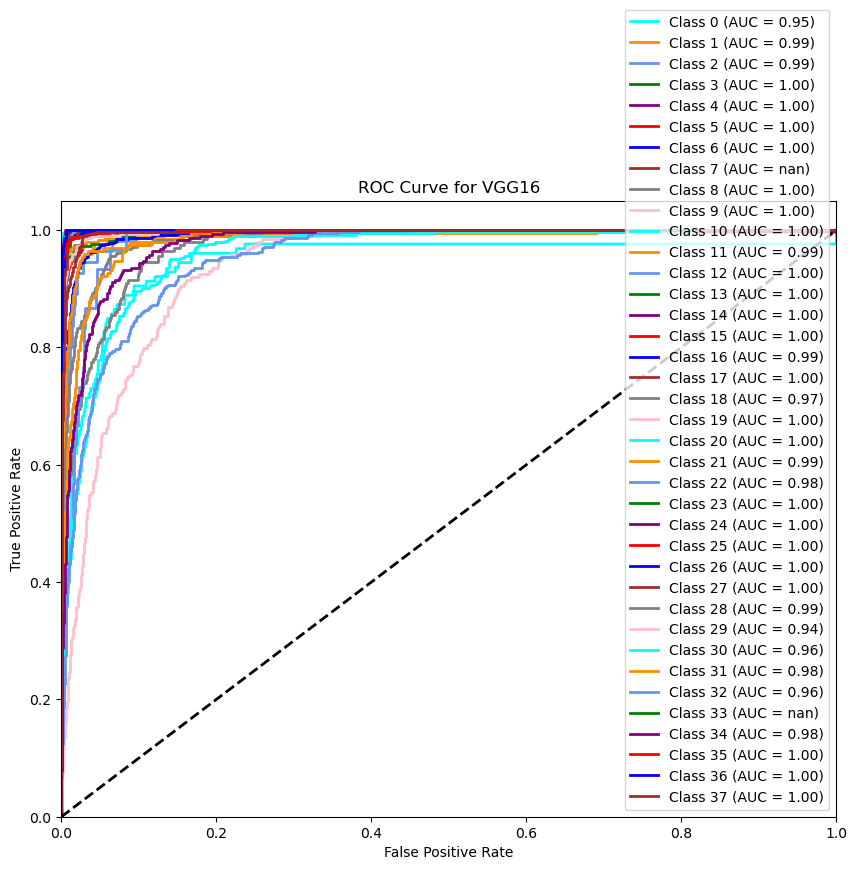

326/326 ━━━━━━━━━━━━━━━━━━━━ 966s 3s/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


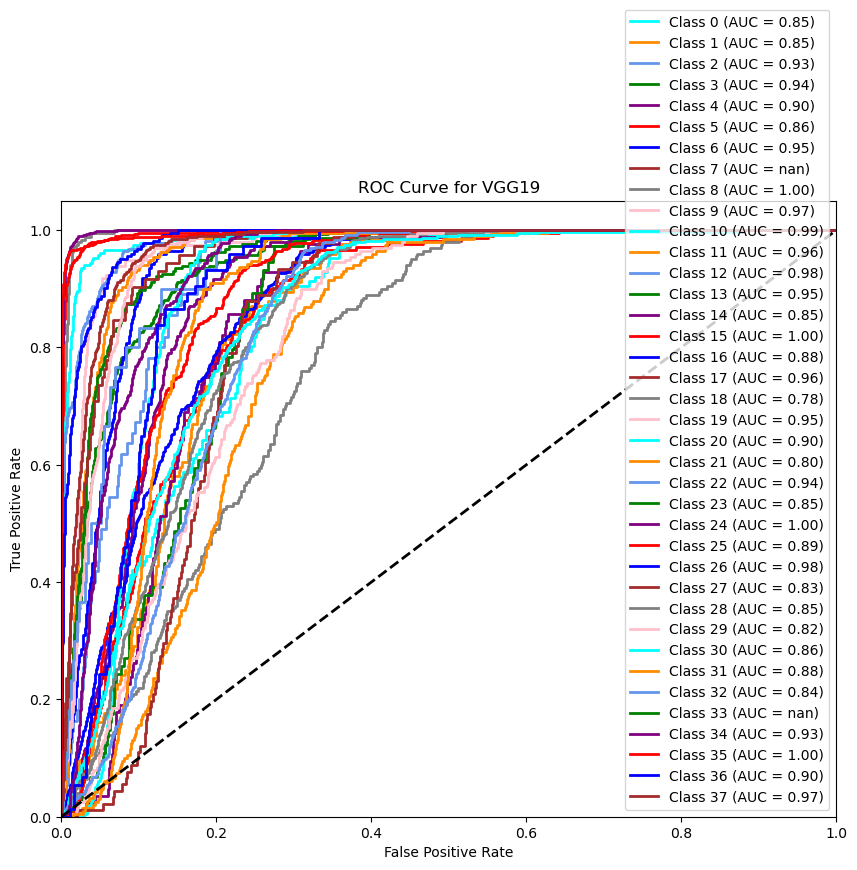

326/326 ━━━━━━━━━━━━━━━━━━━━ 270s 823ms/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


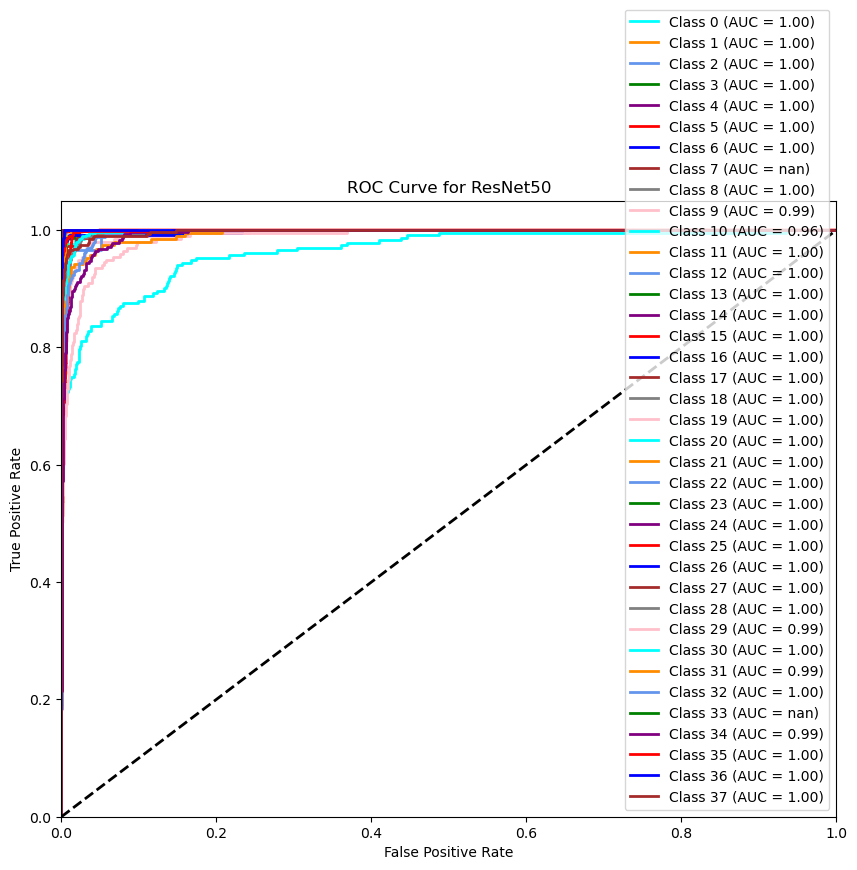

326/326 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


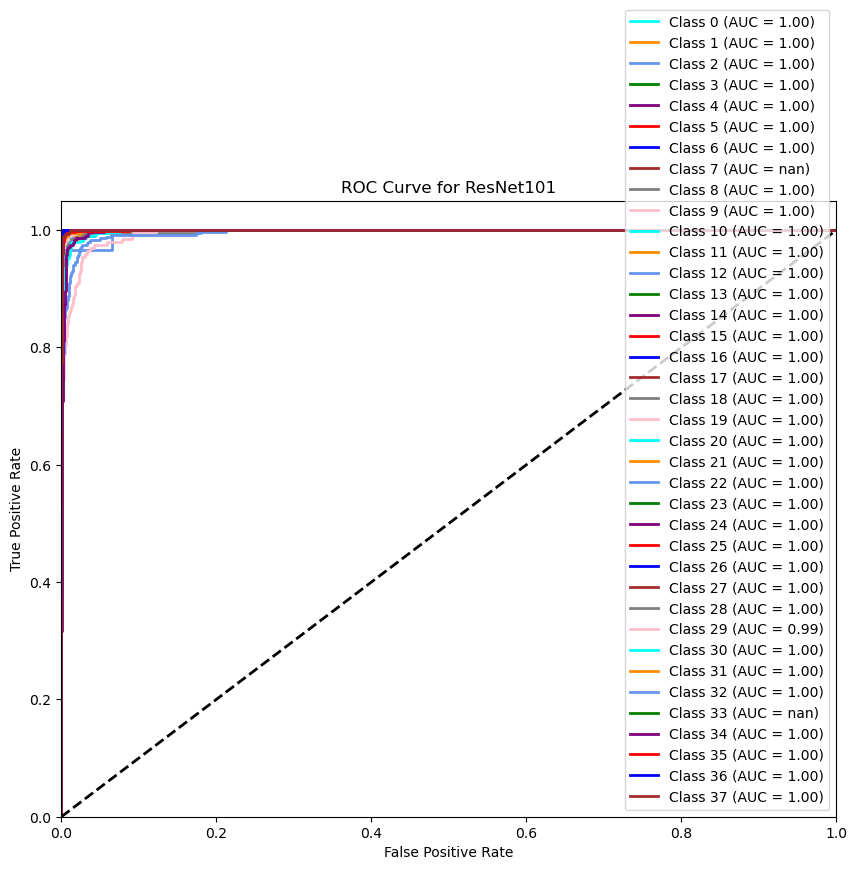

326/326 ━━━━━━━━━━━━━━━━━━━━ 211s 633ms/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


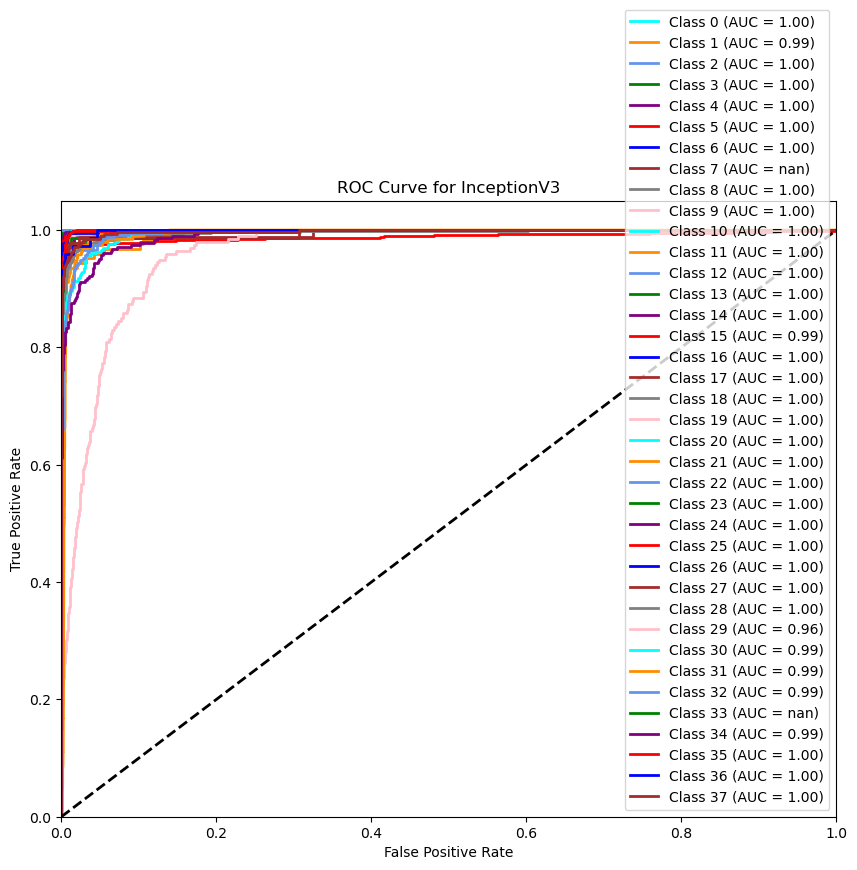

326/326 ━━━━━━━━━━━━━━━━━━━━ 274s 826ms/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


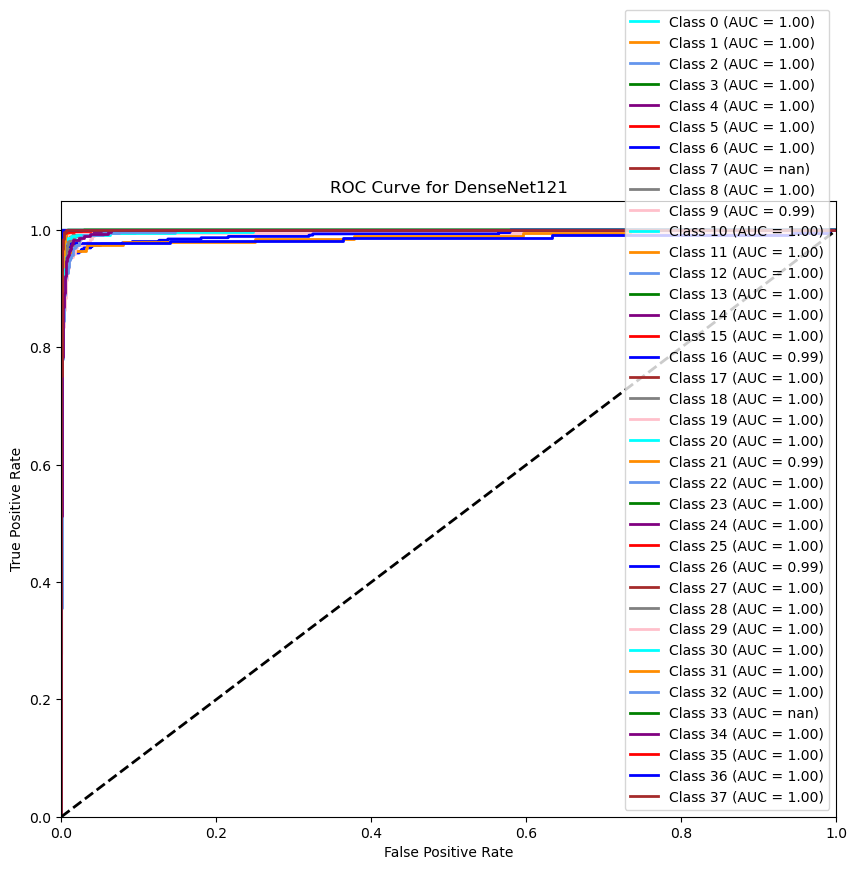

326/326 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


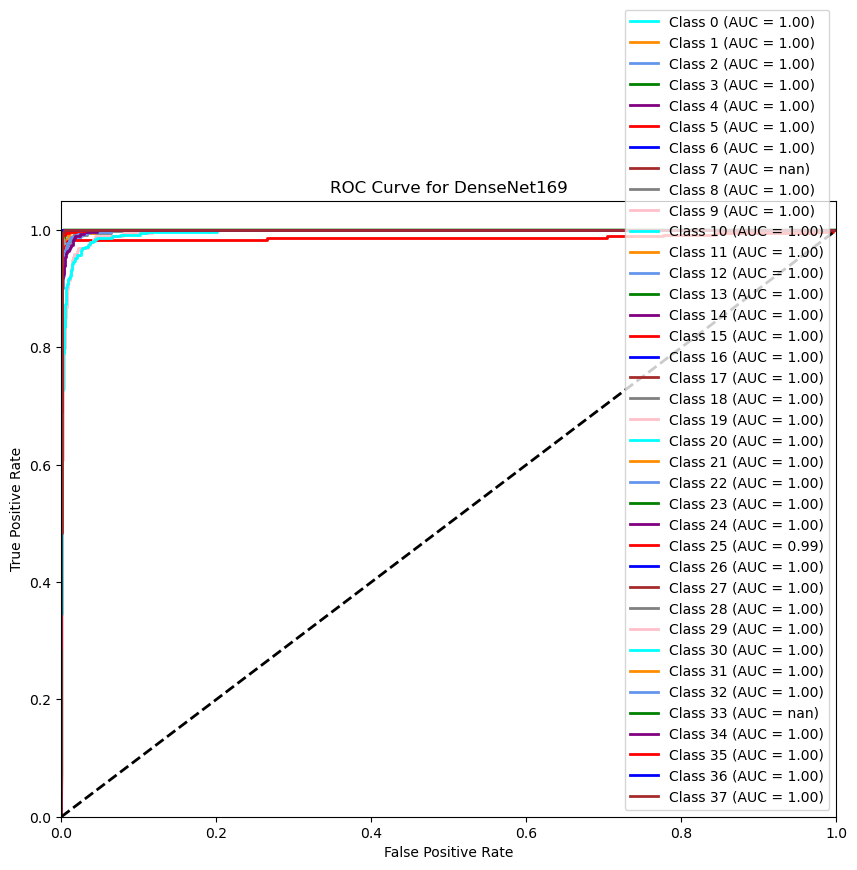

326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 219ms/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


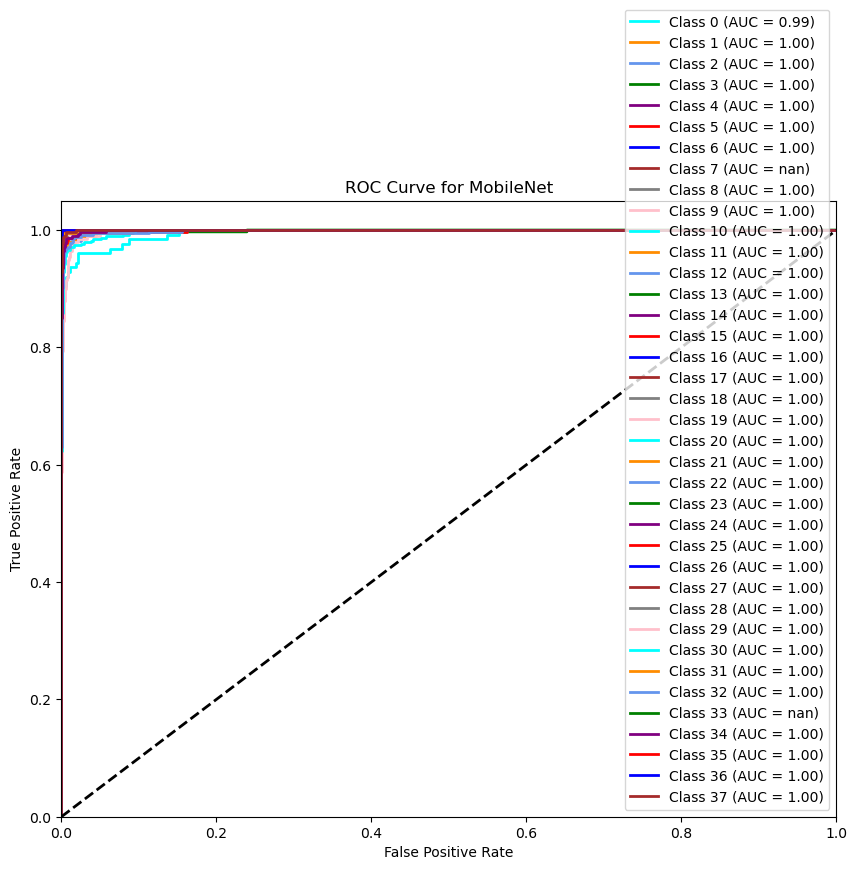

326/326 ━━━━━━━━━━━━━━━━━━━━ 81s 238ms/step


C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\User3\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


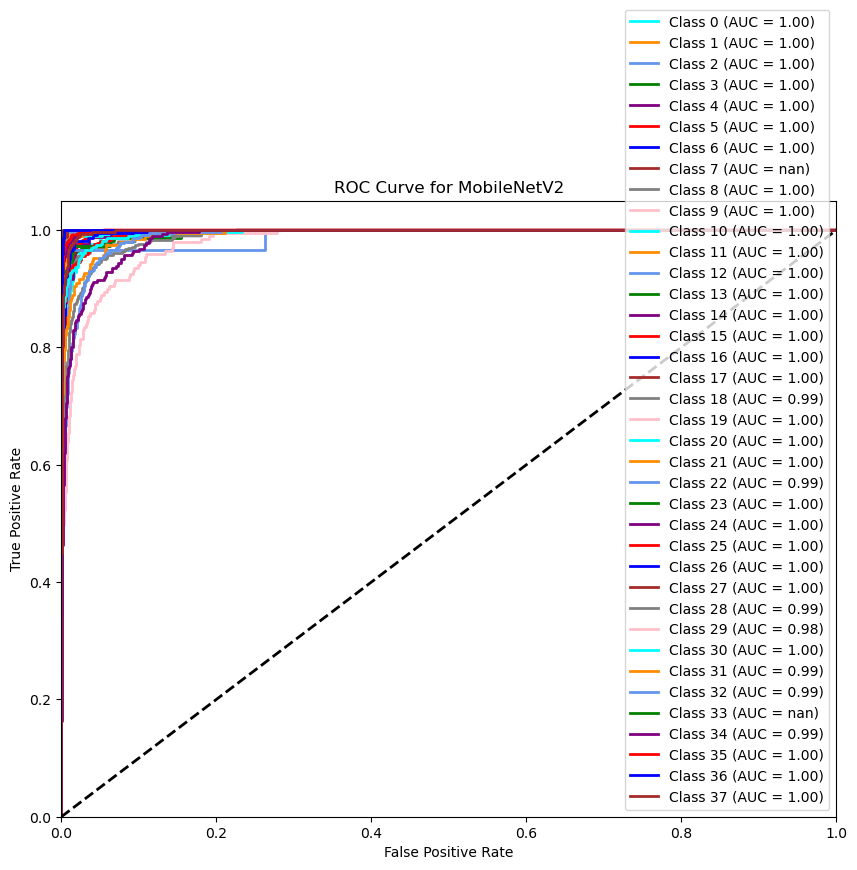

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Number of classes
n_classes = 38  # Set based on your 'classes' dictionary

# List of model names and loaded models
model_names = [
    "VGG16", "VGG19", "ResNet50", "ResNet101",
    "InceptionV3", "DenseNet121", "DenseNet169",
    "MobileNet", "MobileNetV2"
]
models = [
    model_vgg16, model_vgg19, model_resnet50, model_resnet101,
    model_inception_v3, model_DenseNet121, model_DenseNet169,
    model_MobileNet, model_MobileNetv2
]

# Convert y_test to one-hot encoded if it’s not already
if len(y_test.shape) == 1:  # Assuming y_test is not one-hot encoded
    y_test = label_binarize(y_test, classes=np.arange(n_classes))

# Plotting ROC for each model
for model_name, model in zip(model_names, models):
    y_score = model.predict(X_test)  # Replace x_test with your test data

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple', 'red', 'blue', 'brown', 'gray', 'pink'])

    for i, color in zip(range(n_classes), colors):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


326/326 ━━━━━━━━━━━━━━━━━━━━ 921s 3s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 1879s 6s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 1093s 3s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 141s 432ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 172s 529ms/step


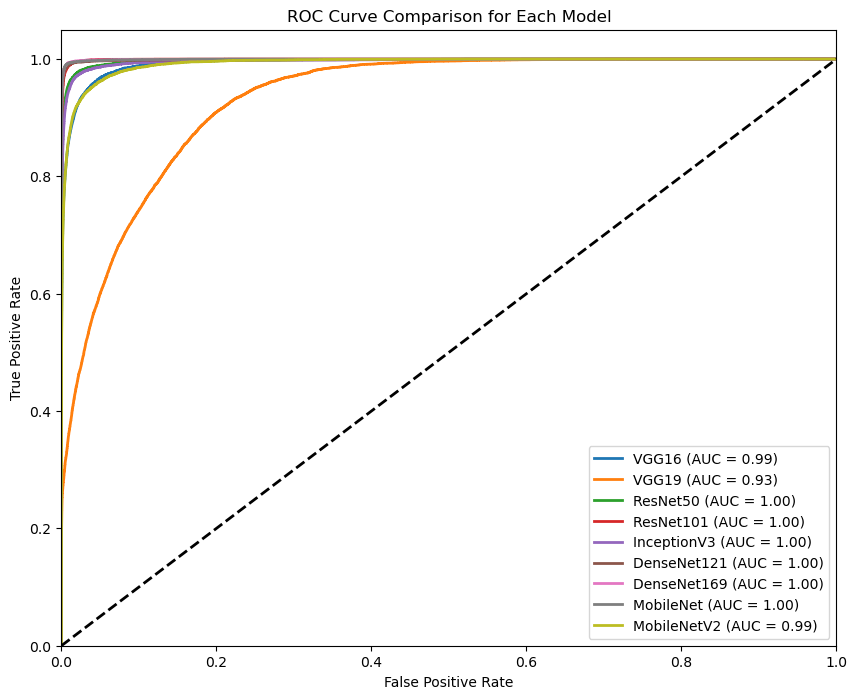

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Number of classes
n_classes = 38

# List of model names and loaded models
model_names = [
    "VGG16", "VGG19", "ResNet50", "ResNet101",
    "InceptionV3", "DenseNet121", "DenseNet169",
    "MobileNet", "MobileNetV2"
]
models = [
    model_vgg16, model_vgg19, model_resnet50, model_resnet101,
    model_inception_v3, model_DenseNet121, model_DenseNet169,
    model_MobileNet, model_MobileNetv2
]

# Convert y_test to one-hot encoded if it’s not already
if len(y_test.shape) == 1:  # Assuming y_test is not one-hot encoded
    y_test = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize plot
plt.figure(figsize=(10, 8))

# Plotting ROC for each model
for model_name, model in zip(model_names, models):
    # Predict probabilities for each class
    y_score = model.predict(X_test)  # Replace x_test with your test data
    
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot single ROC curve for the model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Each Model')
plt.legend(loc="lower right")
plt.show()


326/326 ━━━━━━━━━━━━━━━━━━━━ 1369s 4s/step


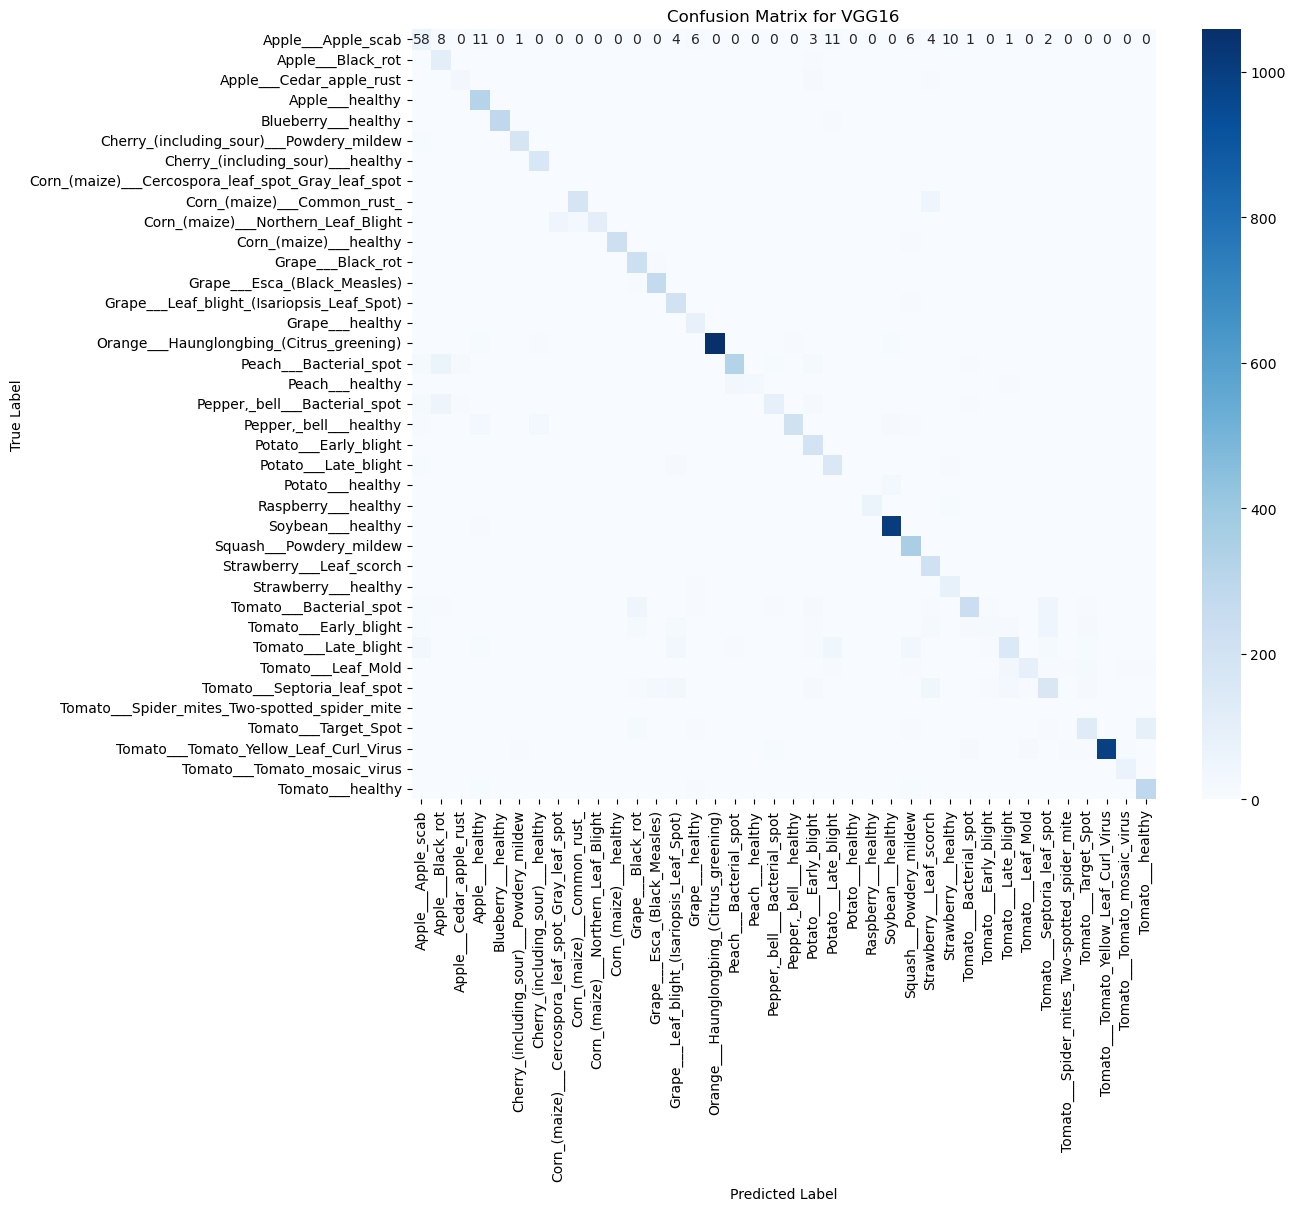

326/326 ━━━━━━━━━━━━━━━━━━━━ 1879s 6s/step


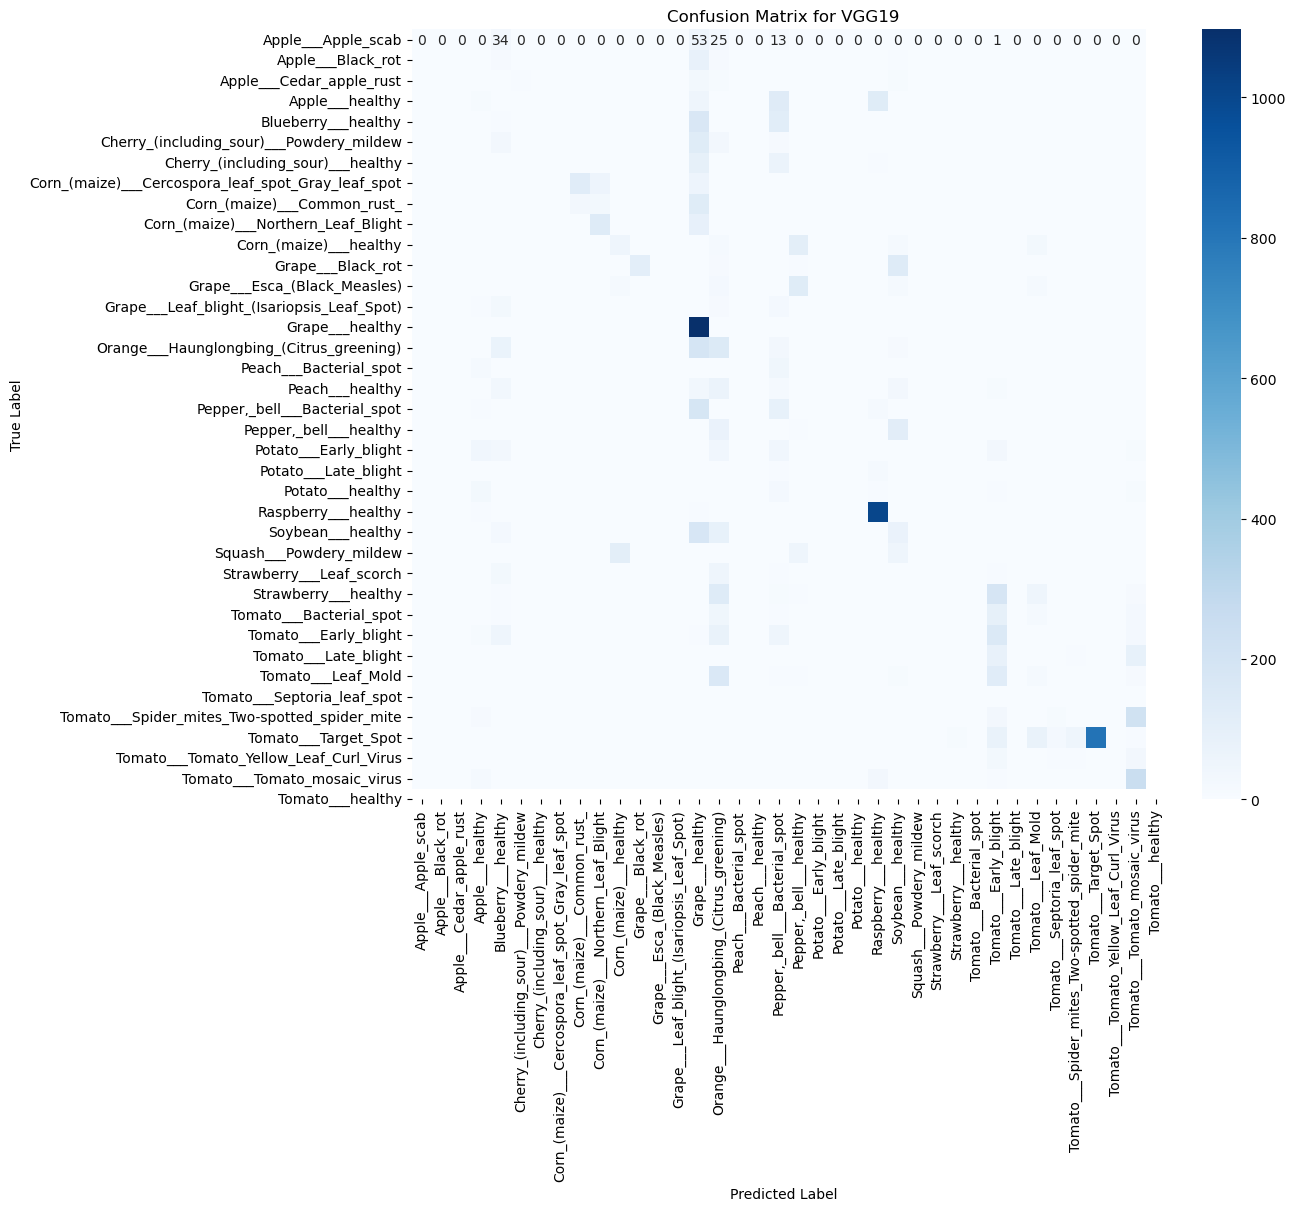

326/326 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step


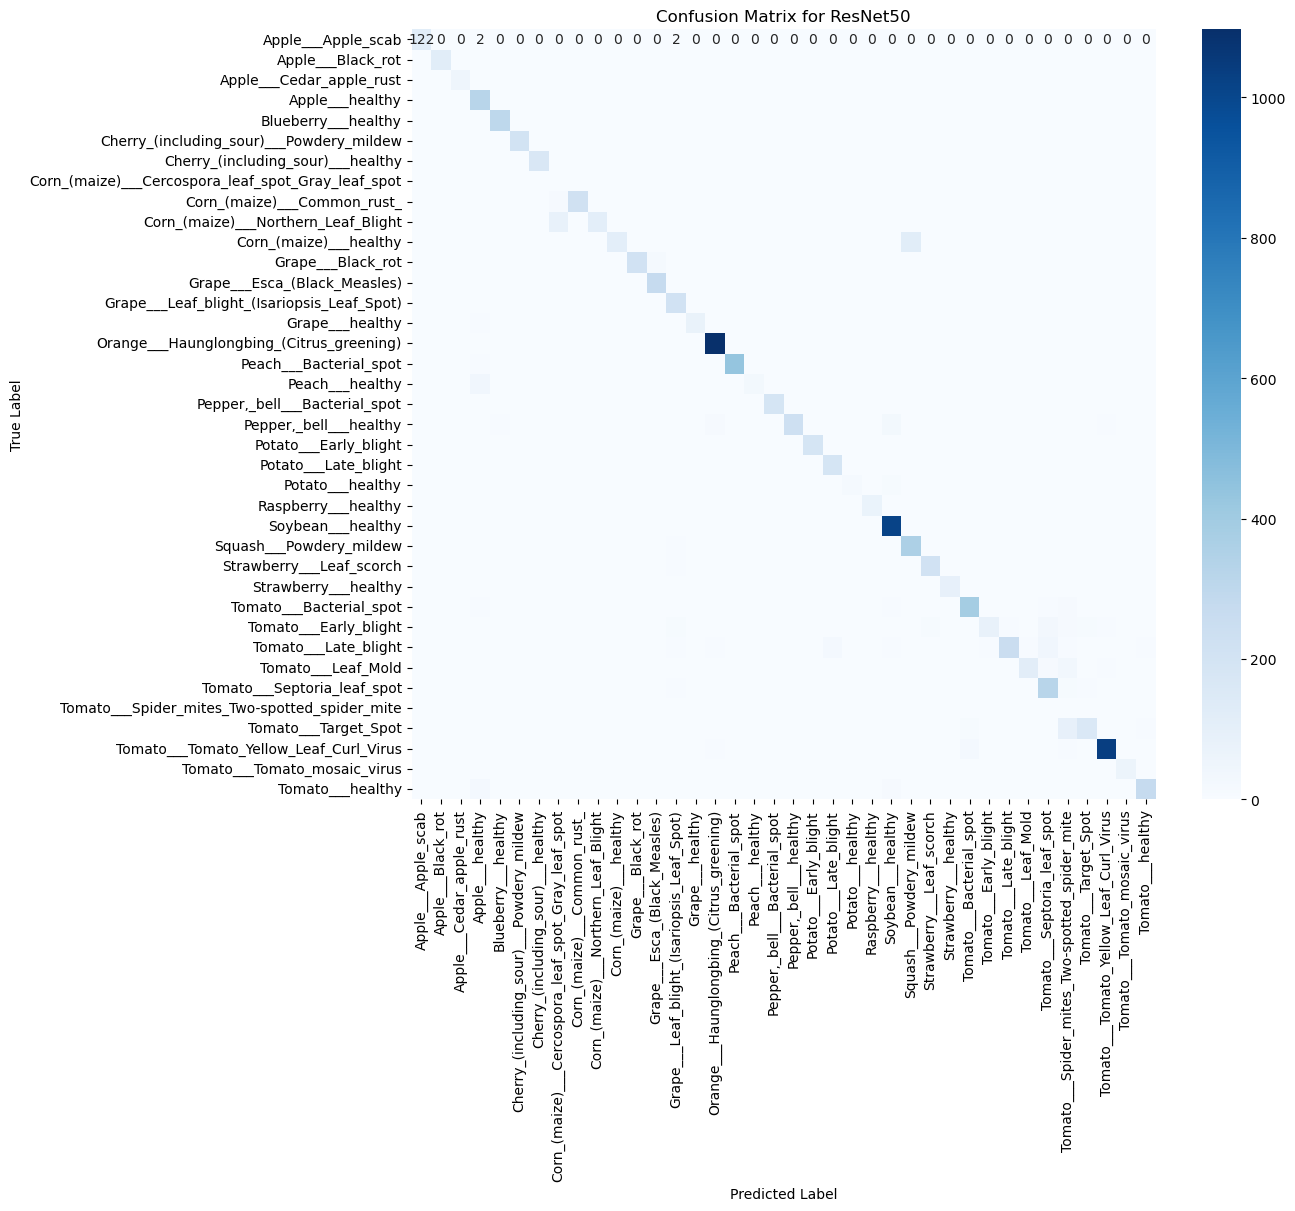

326/326 ━━━━━━━━━━━━━━━━━━━━ 1055s 3s/step


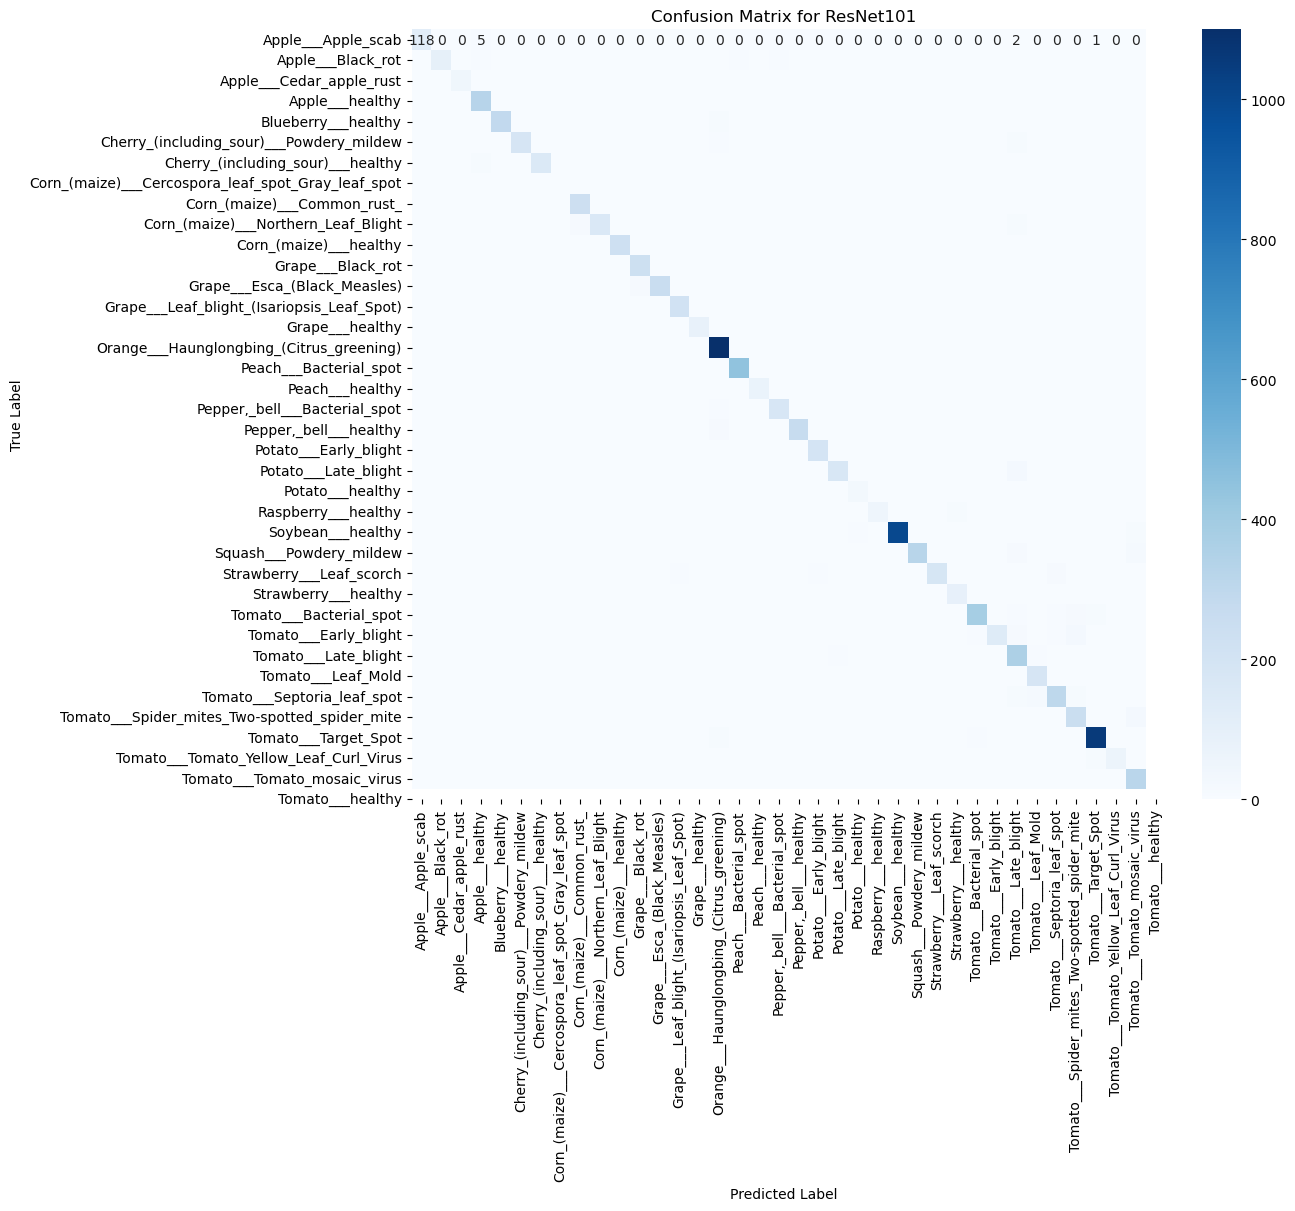

326/326 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step


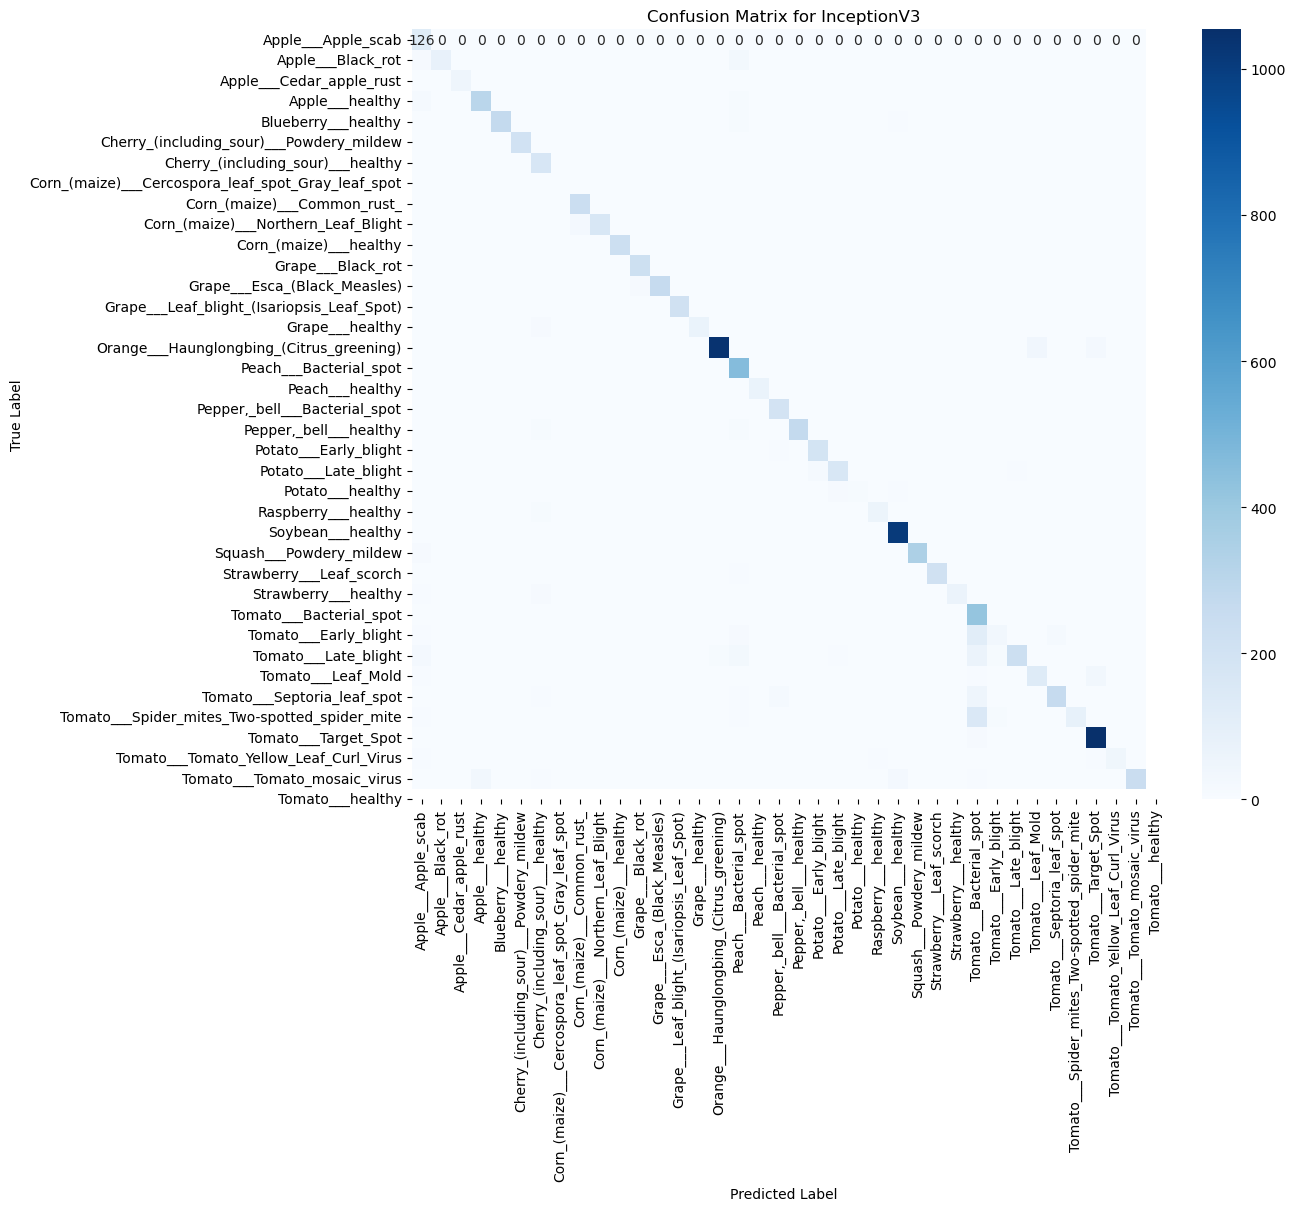

326/326 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step


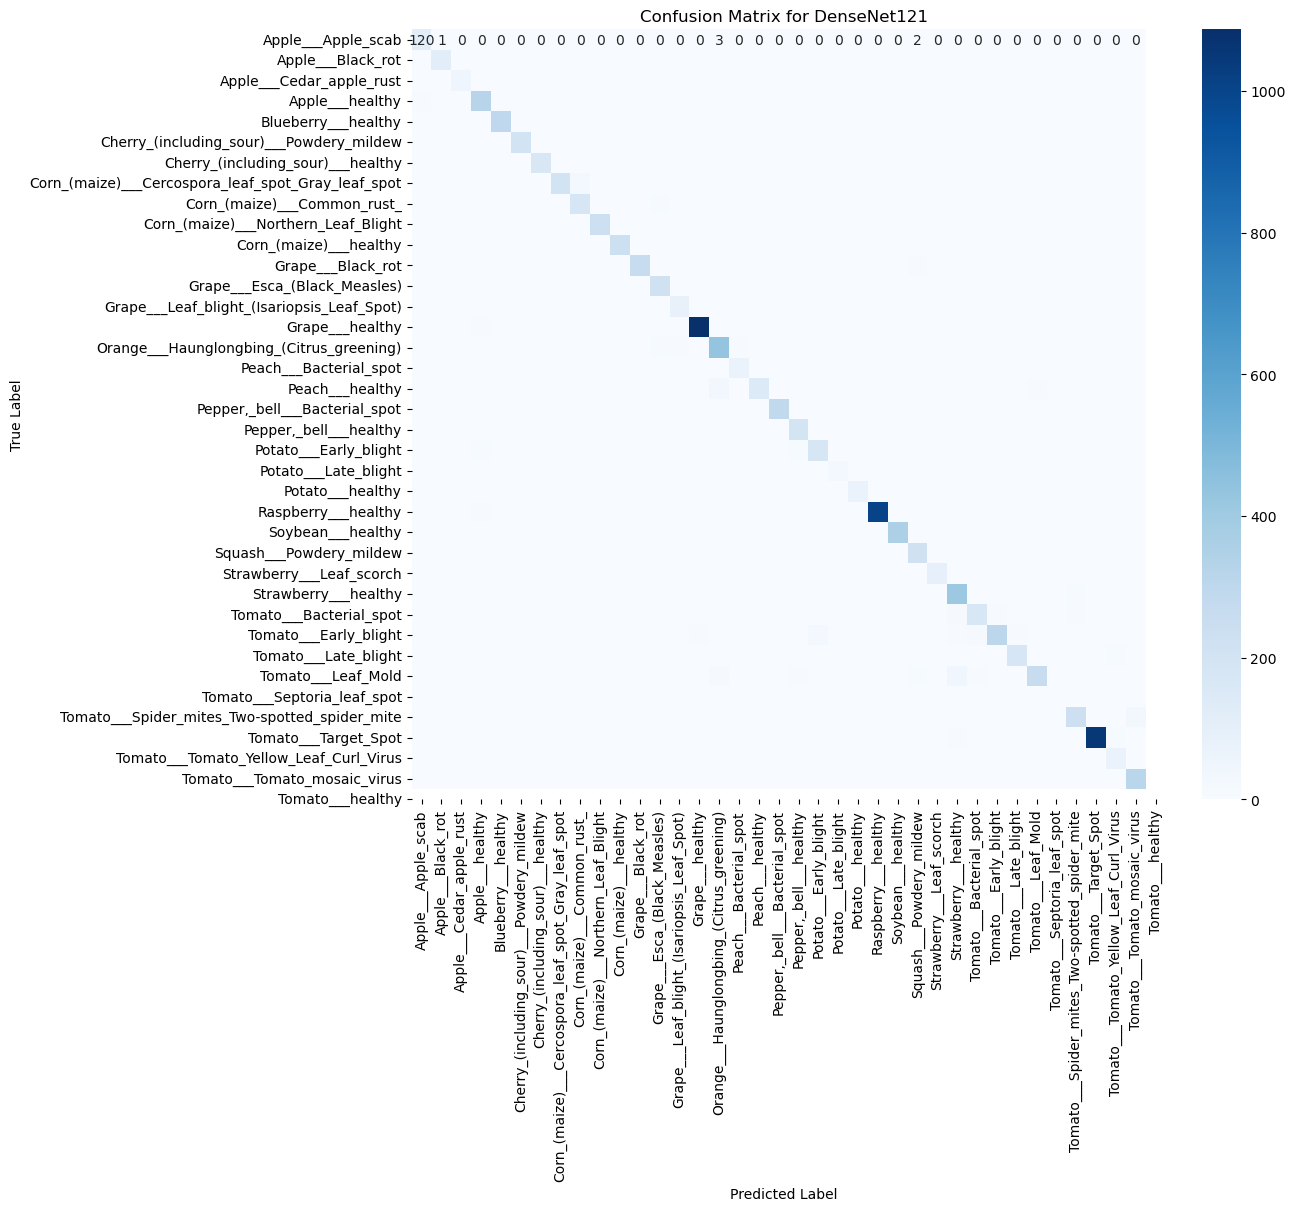

326/326 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step


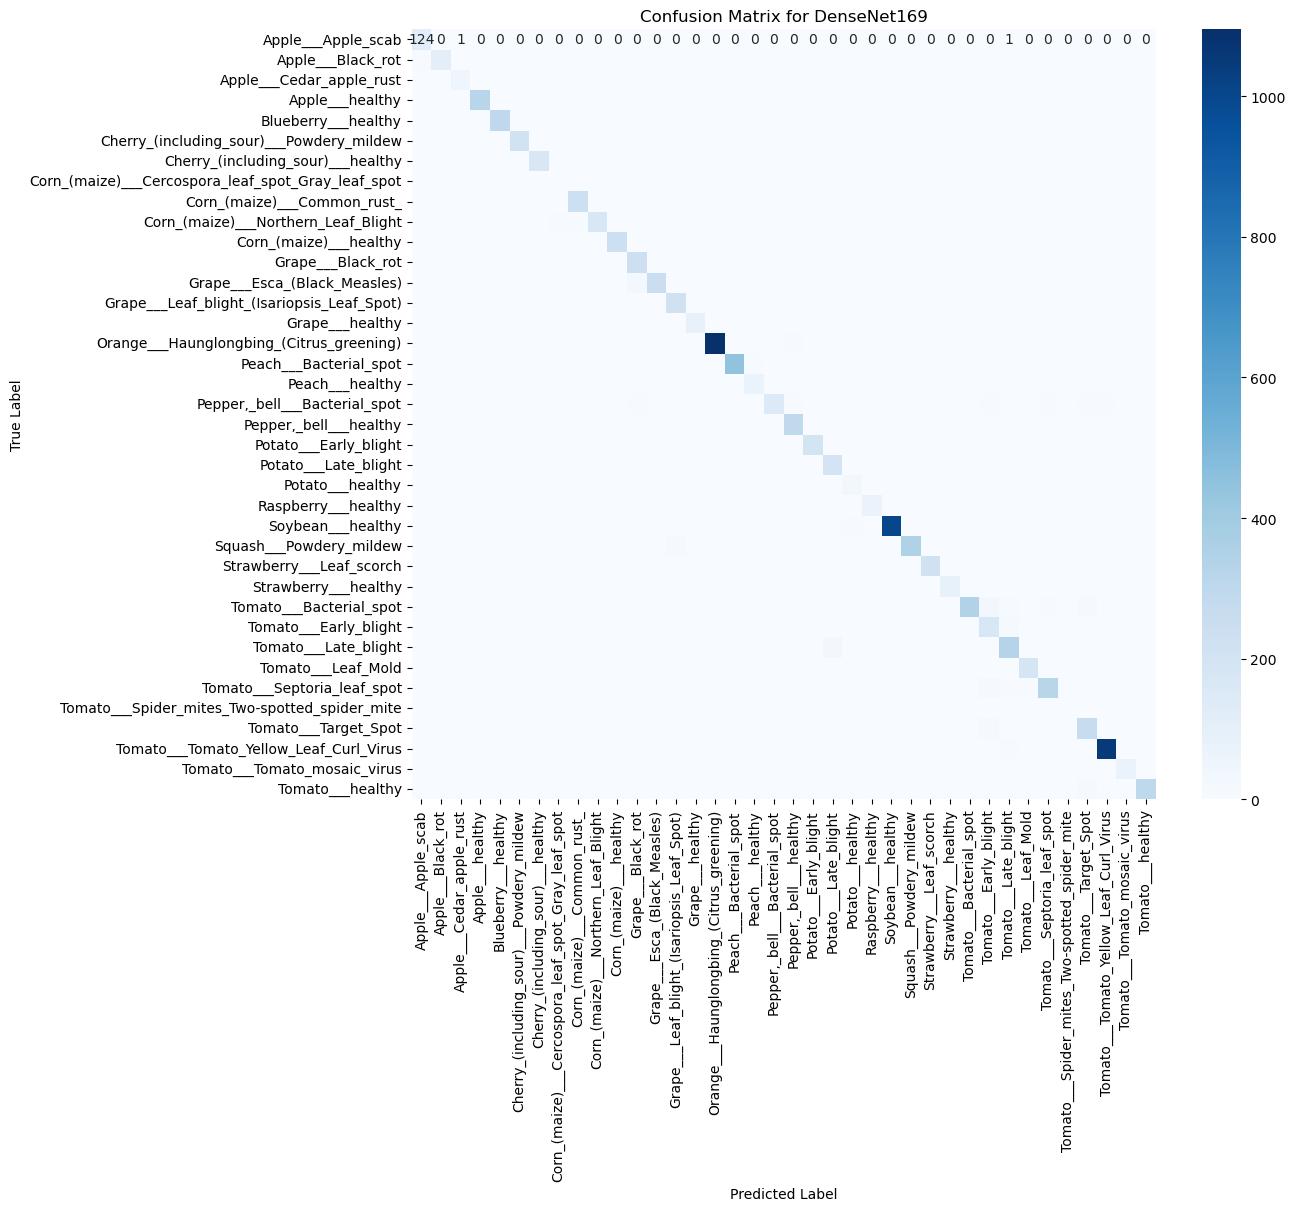

326/326 ━━━━━━━━━━━━━━━━━━━━ 147s 452ms/step


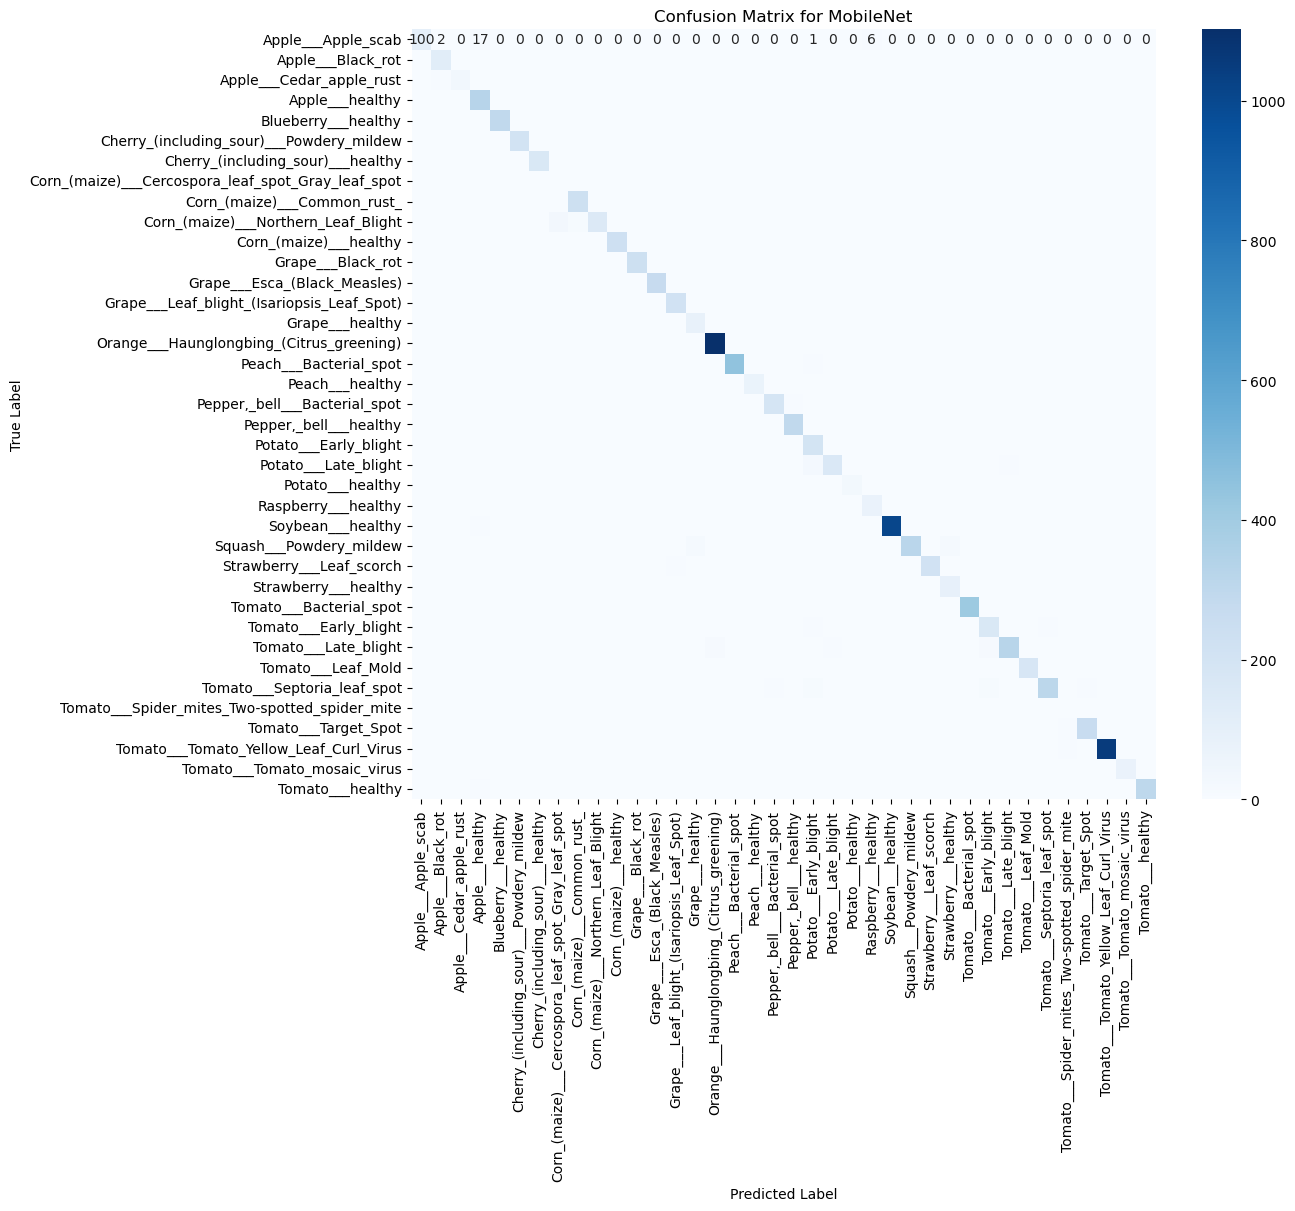

326/326 ━━━━━━━━━━━━━━━━━━━━ 178s 547ms/step


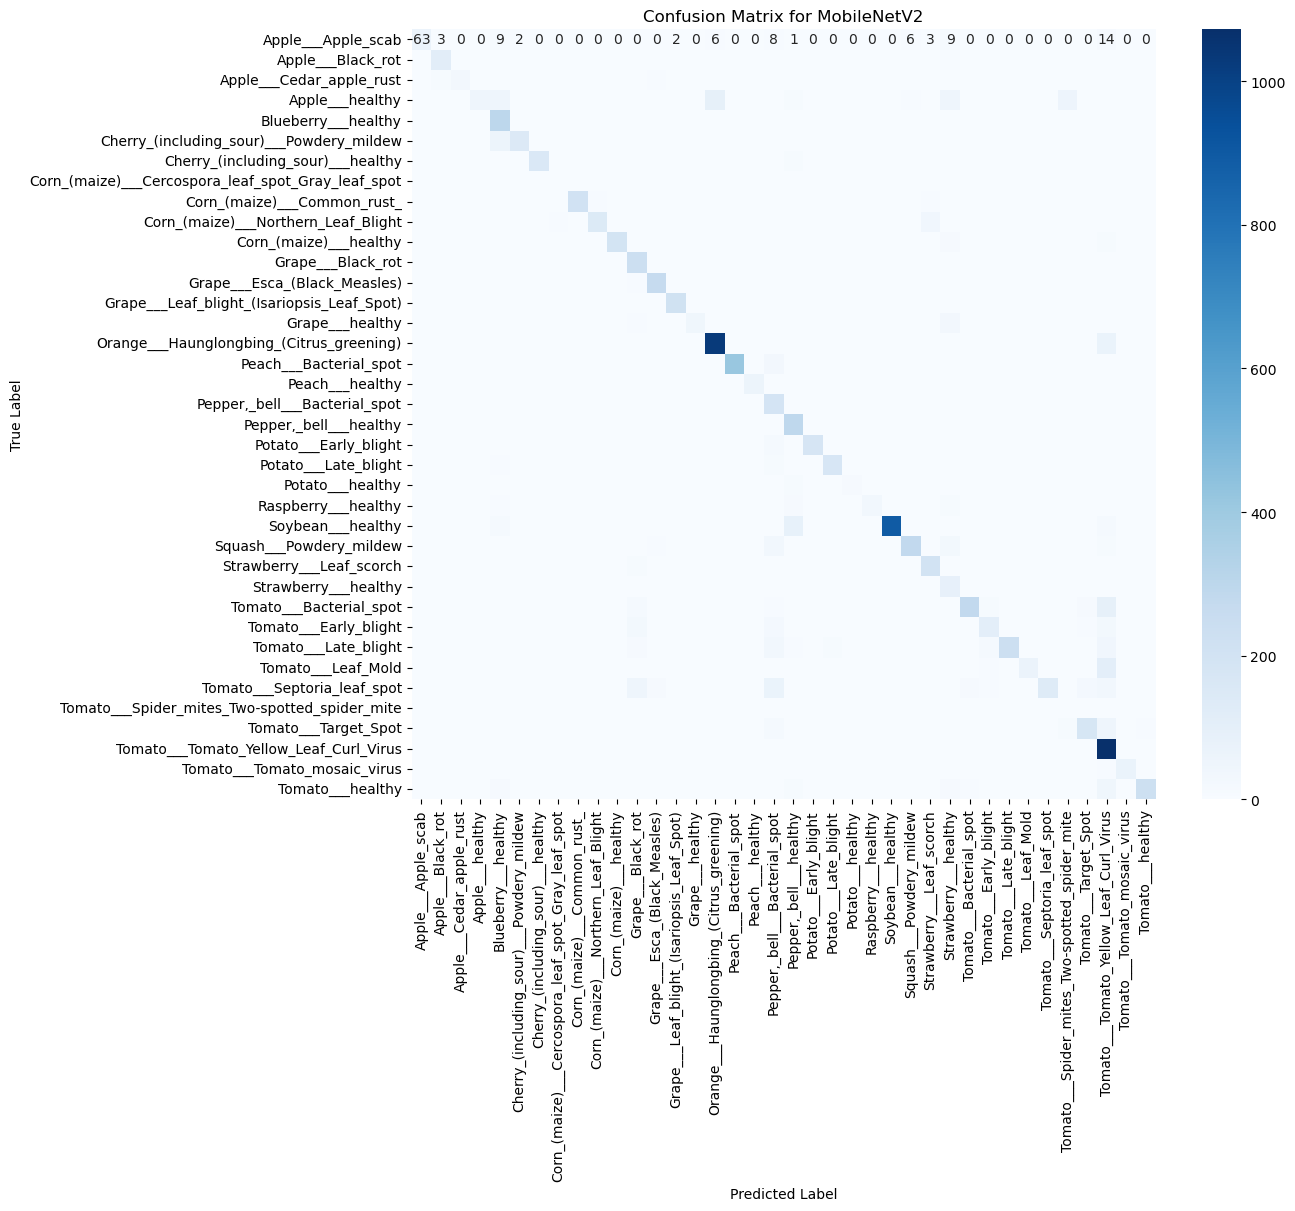

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define your classes dictionary
classes = {
    'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3,
    'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6,
    'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14,
    'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17,
    'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20,
    'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24,
    'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27,
    'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30,
    'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32,
    'Tomato___Spider_mites_Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37
}

# Extract the class labels from the classes dictionary
class_labels = list(classes.keys())

# Number of classes
n_classes = len(classes)

# List of model names and loaded models
model_names = [
    "VGG16", "VGG19", "ResNet50", "ResNet101",
    "InceptionV3", "DenseNet121", "DenseNet169",
    "MobileNet", "MobileNetV2"
]
models = [
    model_vgg16, model_vgg19, model_resnet50, model_resnet101,
    model_inception_v3, model_DenseNet121, model_DenseNet169,
    model_MobileNet, model_MobileNetv2
]

# Convert y_test to label format if it’s one-hot encoded
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format

# Plotting Confusion Matrix for each model
for model_name, model in zip(model_names, models):
    # Get predicted class labels
    y_pred_prob = model.predict(X_test)  # Replace x_test with your test data
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()


326/326 ━━━━━━━━━━━━━━━━━━━━ 1321s 4s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 1677s 5s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 817s 3s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 274s 839ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 466ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 176s 539ms/step


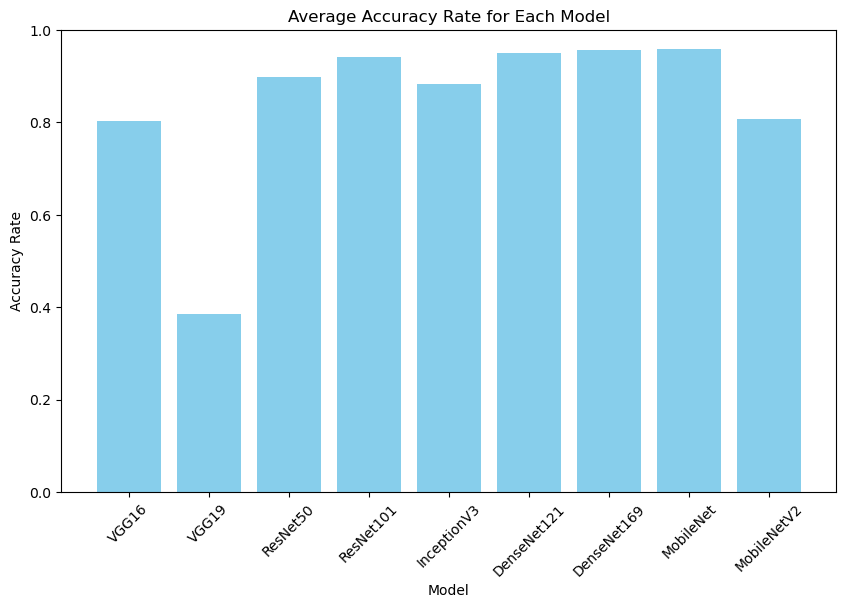

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# List of model names and loaded models
model_names = [
    "VGG16", "VGG19", "ResNet50", "ResNet101",
    "InceptionV3", "DenseNet121", "DenseNet169",
    "MobileNet", "MobileNetV2"
]
models = [
    model_vgg16, model_vgg19, model_resnet50, model_resnet101,
    model_inception_v3, model_DenseNet121, model_DenseNet169,
    model_MobileNet, model_MobileNetv2
]
# Convert y_test to label format if it’s one-hot encoded
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format

# Initialize a list to store accuracy scores
accuracy_scores = []

# Compute accuracy for each model
for model_name, model in zip(model_names, models):
    y_pred_prob = model.predict(X_test)  # Replace x_test with your test data
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    accuracy_scores.append(accuracy)

# Plotting the average accuracy rates
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Rate')
plt.title('Average Accuracy Rate for Each Model')
plt.ylim([0, 1])  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()


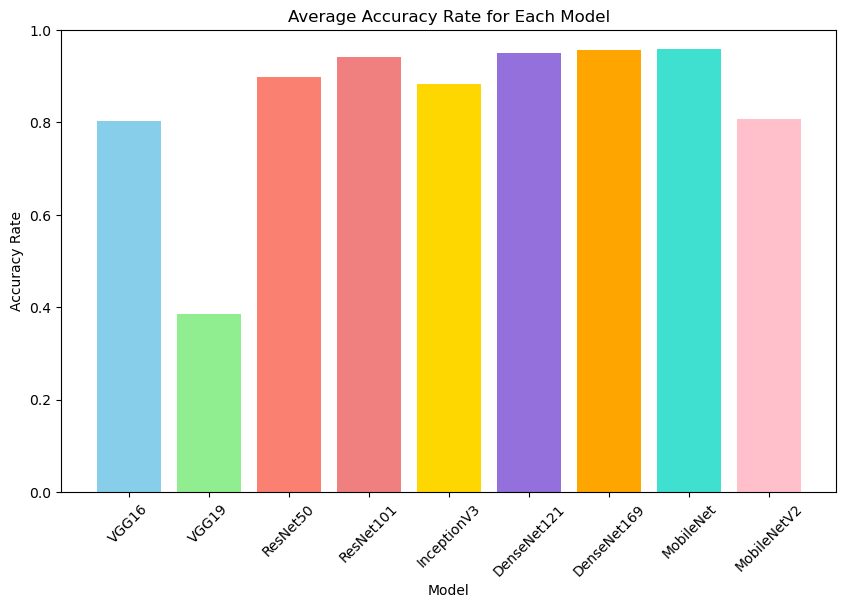

In [118]:
# Define a list of different colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 
          'mediumpurple', 'orange', 'turquoise', 'pink']

# Plotting the average accuracy rates with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy Rate')
plt.title('Average Accuracy Rate for Each Model')
plt.ylim([0, 1])  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()


In [117]:
import matplotlib.pyplot as plt

# Dictionary to store the history of each model
histories = {}

# Assume `x_train`, `y_train`, `x_val`, and `y_val` are your training and validation datasets
# Replace with actual data variables if different
for name, model in members.items():
    print(f"Training model: {name}")
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Set the number of epochs as needed
        validation_data=(X_test, y_test),  # Assuming you have a validation set
        batch_size=32,  # Adjust batch size as needed
        verbose=1
    )
    histories[name] = history

# Plotting Accuracy for Each Model
plt.figure(figsize=(14, 8))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], linestyle="--", label=f'{name} Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Each Model')
plt.legend(loc="lower right")
plt.show()

# Plotting Loss for Each Model
plt.figure(figsize=(14, 8))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Train Loss')
    plt.plot(history.history['val_loss'], linestyle="--", label=f'{name} Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Each Model')
plt.legend(loc="upper right")
plt.show()


Training model: vgg16
Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 38)

Model: VGG16 - Loss: 1.2225 - Accuracy: 0.8036
Model: VGG19 - Loss: 1.9695 - Accuracy: 0.3853
Model: ResNet50 - Loss: 0.4149 - Accuracy: 0.8977
Model: ResNet101 - Loss: 0.1900 - Accuracy: 0.9414
Model: InceptionV3 - Loss: 0.4627 - Accuracy: 0.8828
Model: DenseNet121 - Loss: 0.2075 - Accuracy: 0.9491
Model: DenseNet169 - Loss: 0.1573 - Accuracy: 0.9576
Model: MobileNet - Loss: 0.1483 - Accuracy: 0.9580
Model: MobileNetV2 - Loss: 0.9964 - Accuracy: 0.8066


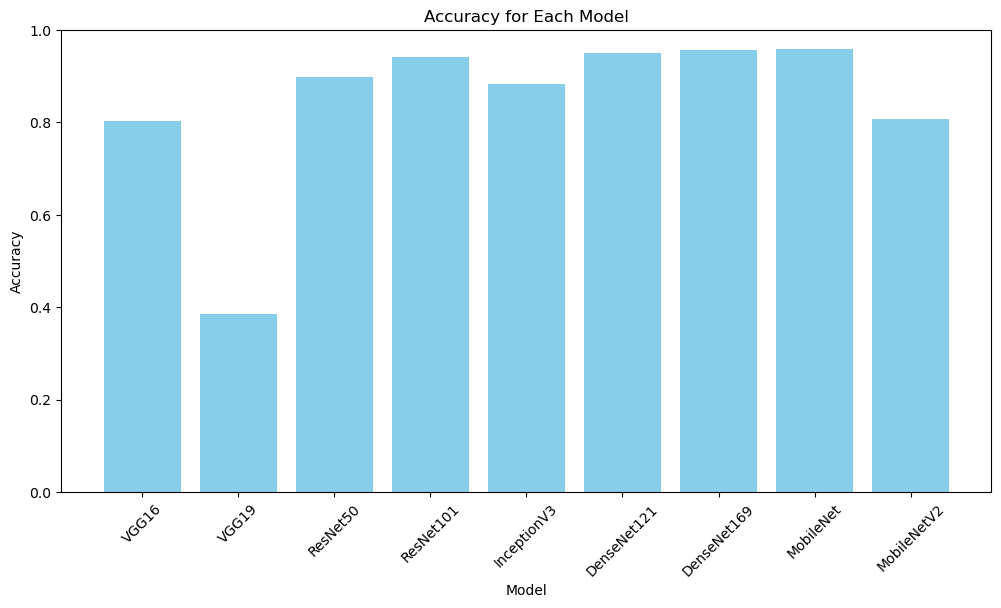

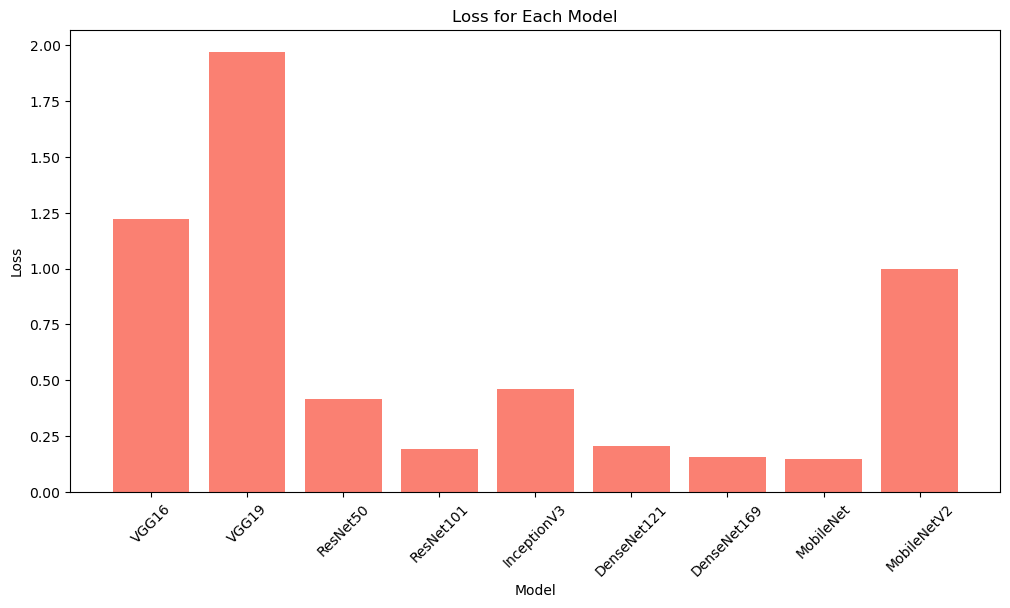

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# List of model names and loaded models
model_names = [
    "VGG16", "VGG19", "ResNet50", "ResNet101",
    "InceptionV3", "DenseNet121", "DenseNet169",
    "MobileNet", "MobileNetV2"
]
models = [
    model_vgg16, model_vgg19, model_resnet50, model_resnet101,
    model_inception_v3, model_DenseNet121, model_DenseNet169,
    model_MobileNet, model_MobileNetv2
]

# Initialize lists to store loss and accuracy for each model
accuracy_scores = []
loss_scores = []

# Evaluate each model on the test set and store the loss and accuracy
for model_name, model in zip(model_names, models):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Replace x_test, y_test with your test data
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)
    print(f"Model: {model_name} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

# Plot Accuracy for Each Model
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Model')
plt.ylim([0, 1])  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()

# Plot Loss for Each Model
plt.figure(figsize=(12, 6))
plt.bar(model_names, loss_scores, color='salmon')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss for Each Model')
plt.xticks(rotation=45)
plt.show()


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define the class labels from your plant disease dataset
classes = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 
    'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
    'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 
    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 
    'Tomato___healthy'
]

# Assuming y_test and yhat_RF are already in 1D label format
# Plot confusion matrix heatmap
plt.figure(figsize=(12, 12))  # Adjust the size for better readability with 38 classes
hm = sns.heatmap(
    confusion_matrix(y_test, yhat_RF),  # y_test: true labels, yhat_RF: predicted labels
    annot=True, 
    vmin=0, 
    fmt='g', 
    cmap='Blues', 
    cbar=False, 
    xticklabels=classes,  # Set x-ticks to class names
    yticklabels=classes   # Set y-ticks to class names
)

# Set axis labels
hm.set(xlabel='Predicted Labels', ylabel='True Labels')

# Display the confusion matrix
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.yticks(rotation=0)   # Keep y-labels horizontal
plt.show()

# Print classification report
print(classification_report(y_test, yhat_RF, target_names=classes))


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

<Figure size 1200x1200 with 0 Axes>